# Attack Comments Classification
2020.10.03

Modify on the data label

Student: Xuanyu Su                                                                 
Supervisor: Isar Nejadgholi

# Parameters

In [56]:
source_folder = 'Data'
destination_folder = 'Model'

In [37]:
import pandas as pd
comments = pd.read_csv('attack_annotated_comments.tsv',sep='\t',encoding = "ISO-8859-1")
annotation = pd.read_csv('attack_annotations.tsv',sep='\t',encoding = "ISO-8859-1")
worker = pd.read_csv('attack_worker_demographics.tsv',sep='\t',encoding = "ISO-8859-1")

In [38]:
annotation.head()

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0


In [39]:
comments.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train


In [40]:
worker.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


In [41]:
# from tqdm import tqdm
# temp = 0
# for i in tqdm(range(len(annotation))):
#     temp2 = 0
#     temp2 = annotation['quoting_attack'][i] + annotation['recipient_attack'][i] + annotation['other_attack'][i] + annotation['third_party_attack'][i] + annotation['attack'][i]
#     if temp2 > 0:
#         temp+=1
# print('ratio of attack',temp/len(annotation))

In [42]:
result = pd.merge(comments, annotation, how='left', on=['rev_id'])

In [200]:
result.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1362,0.0,0.0,0.0,0.0,0.0
1,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,2408,0.0,0.0,0.0,0.0,0.0
2,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1493,0.0,0.0,0.0,0.0,0.0
3,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1439,0.0,0.0,0.0,0.0,0.0
4,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,170,0.0,0.0,0.0,0.0,0.0


In [201]:
new_label = result.groupby('rev_id')['attack'].mean() > 0.5

In [202]:
len(new_label)

115864

In [204]:
import numpy as np
len(np.unique(result['rev_id']))

115864

In [205]:
result = result.drop_duplicates(subset=['rev_id'])

In [206]:
label_list = []
for i in new_label:
    if i is True:
        label_list.append(1.0)
    else:
        label_list.append(0.0)

In [207]:
result['attack'] = label_list

In [208]:
result.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1362,0.0,0.0,0.0,0.0,0.0
10,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train,1158,0.0,0.0,0.0,0.0,0.0
19,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train,447,0.0,0.0,0.0,0.0,0.0
29,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,3307,0.0,0.0,0.0,0.0,0.0
38,93890,This page will need disambiguation.,2002,True,article,random,train,1369,0.0,0.0,0.0,0.0,0.0


In [209]:
for i in result['comment'][:4]:
    print(i)
    print('   ')

`-NEWLINE_TOKENThis is not ``creative``.  Those are the dictionary definitions of the terms ``insurance`` and ``ensurance`` as properly applied to ``destruction``.  If you don't understand that, fine, legitimate criticism, I'll write up ``three man cell`` and ``bounty hunter`` and then it will be easy to understand why ``ensured`` and ``insured`` are different - and why both differ from ``assured``.NEWLINE_TOKENNEWLINE_TOKENThe sentence you quote is absolutely neutral.  You just aren't familiar with the underlying theory of strike-back (e.g. submarines as employed in nuclear warfare) guiding the insurance, nor likely the three man cell structure that kept the IRA from being broken by the British.  If that's my fault, fine, I can fix that to explain.  But ther'es nothing ``personal`` or ``creative`` about it.NEWLINE_TOKENNEWLINE_TOKENI'm tired of arguing with you.  Re: the other article, ``multi-party`` turns up plenty, and there is more use of ``mutually`` than ``mutual``.  If I were t

In [210]:
import re
result['comment'] = result['comment'].apply(lambda x:re.sub(r'[^A-Za-z0-9 ]+', ' ', x).lower())

In [211]:
result['comment'] = result['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
result['comment'] = result['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))

In [212]:
from tqdm import tqdm
symbol_list = ['!','@','#','$','%','^','&','*','(',')','-','+','?','>','<','=','/',"`",'"','.',':',';','  ','   ','    ','      ','      ']
for i in tqdm(symbol_list):
    result['comment'] = result['comment'].apply(lambda x: x.replace(i, ' '))

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:01<00:00, 19.71it/s]


In [213]:
result.tail()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
1365169,699848324,newline tokennewline tokennewline tokenthese ...,2016,True,article,blocked,train,1842,0.0,0.0,0.0,0.0,0.0
1365178,699851288,newline tokennewline tokenthe institute for hi...,2016,True,article,blocked,test,337,0.0,0.0,0.0,0.0,0.0
1365188,699857133,newline token the way you re trying to describ...,2016,True,article,blocked,train,331,0.0,0.0,0.0,0.0,0.0
1365197,699891012,newline tokennewline token warning newline tok...,2016,True,user,blocked,dev,2593,0.0,0.0,0.0,0.0,0.0
1365207,699897151,alternate option newline tokenis there perhaps...,2016,True,article,blocked,train,151,0.0,0.0,0.0,0.0,0.0


In [214]:
result[result['attack'] == 1]['comment'].head()

749      iraq is not good  newline tokennewline token ...
2680    newline tokennewline token newline tokenfuck o...
4574           i have a dick its bigger than yours hahaha
6299    newline tokennewline token renault newline tok...
6309    newline tokennewline token renault newline tok...
Name: comment, dtype: object

In [215]:
result2 = result.drop(columns = ['rev_id','year','logged_in','ns','sample','worker_id','quoting_attack','recipient_attack','third_party_attack','other_attack'])

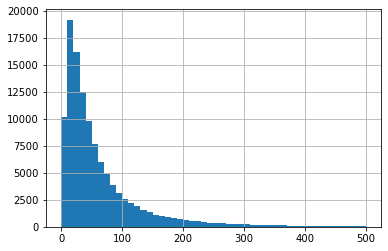

In [216]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in result2['comment']]
pd.Series(seq_len).hist(bins = 50,range=[0,500])

In [217]:
Train_comment = result2[result2['split']=='train']
dec_comment = result2[result2['split']=='dev']
test_comment = result2[result2['split']=='test']

In [218]:
print('length of train set is',len(Train_comment))
print('length of dev set is',len(dec_comment))
print('length of test set is',len(test_comment))

length of train set is 69526
length of dev set is 23160
length of test set is 23178


In [219]:
Train_comment = Train_comment.drop(columns = ['split'])
dec_comment = dec_comment.drop(columns = ['split'])
test_comment = test_comment.drop(columns = ['split'])

In [222]:
test_comment.head()

,comment,attack
125,newline tokennewline token if i may butt in i ...,0.0
134,newline tokennewline tokennewline tokenon my y...,0.0
219,newline tokennewline tokennewline tokennewline...,0.0
265,see i was right newline tokennewline token,0.0
377,newline tokennewline tokennewline tokennewlin...,0.0


In [223]:
Train_comment.head()

,comment,attack
0,newline tokenthis is not creative those are ...,0.0
10,newline tokennewline token the term standard ...,0.0
19,newline tokennewline tokentrue or false the si...,0.0
38,this page will need disambiguation,0.0
47,newline token newline tokennewline tokenimport...,0.0


In [224]:
# check class distribution
Train_comment['attack'].value_counts(normalize = True)

0.0    0.883799
1.0    0.116201
Name: attack, dtype: float64

In [225]:
Train_comment.to_csv('Data/Train_comment.csv',index=False,header=True)
dec_comment.to_csv('Data/Val_comment.csv',index=False,header=True)
test_comment.to_csv('Data/Test_comment.csv',index=False,header=True)

In [292]:
Train_comment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69526 entries, 0 to 1365207
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  69526 non-null  object 
 1   attack   69526 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [226]:
print(torch.__version__)
print(transformers.__version__)

1.6.0
3.1.0


# Libraries

In [52]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import torch
import transformers
# Preliminaries

from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models

import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification

# Training

import torch.optim as optim

# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [53]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Preliminaries

In [54]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [57]:
# Model parameter
MAX_SEQ_LEN = 128
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

# Fields

label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('comment', text_field),('attack', label_field)]

# TabularDataset

train, valid, test = TabularDataset.splits(path=source_folder, train='Train_comment.csv', validation='Val_comment.csv',
                                           test='test6.csv', format='CSV', fields=fields, skip_header=True)


train_iter = BucketIterator(train, batch_size=16, sort_key=lambda x: len(x.comment),
                            device=device, train=True, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid, batch_size=16, sort_key=lambda x: len(x.comment),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(test, batch_size=16, device=device, train=False, shuffle=False, sort=False)


Token indices sequence length is longer than the specified maximum sequence length for this model (726 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (535 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (930 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (797 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (535 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (927 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (561 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (885 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1232 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (527 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token indices sequence length is longer than the specified maximum sequence length for this model (1022 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1933 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1084 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (944 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (938 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (954 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (600 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (645 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (539 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (691 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1087 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2823 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (929 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (570 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (676 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (615 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (824 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (2729 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (858 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1230 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (531 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (551 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (609 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1010 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (745 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1164 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (883 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (958 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1536 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1164 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (747 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1091 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (836 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (931 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (993 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (760 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (906 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (674 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1517 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (891 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1158 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1893 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (745 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (913 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (775 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (755 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (525 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (741 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1250 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (586 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1889 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (731 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (981 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (906 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (756 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (592 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (610 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (904 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (708 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (535 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (724 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1954 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (787 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (752 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3750 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (775 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3999 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (602 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2572 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1042 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (1070 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (714 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (867 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1422 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1044 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (582 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (839 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3205 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2598 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (727 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (943 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2850 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (682 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (965 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (948 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token indices sequence length is longer than the specified maximum sequence length for this model (849 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (721 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (598 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1356 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2732 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (674 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (711 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (586 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (548 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (1550 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1000 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1177 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1105 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1140 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length fo

Token indices sequence length is longer than the specified maximum sequence length for this model (687 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (963 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (549 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (548 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (562 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (808 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (549 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (665 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (602 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (835 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (550 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token indices sequence length is longer than the specified maximum sequence length for this model (880 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (697 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1708 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (680 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (600 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (697 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1443 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (579 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token indices sequence length is longer than the specified maximum sequence length for this model (1478 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (662 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (599 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1088 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (582 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (612 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (585 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (966 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1240 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token indices sequence length is longer than the specified maximum sequence length for this model (963 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1141 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1910 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1956 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (952 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1625 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1730 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3498 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (807 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1124 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1004 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (562 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (1246 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (740 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1021 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (936 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (792 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (943 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (736 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (950 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (670 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1159 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (965 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2398 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (637 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (985 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (673 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (595 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (864 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (648 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (722 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1154 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (540 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (817 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token indices sequence length is longer than the specified maximum sequence length for this model (850 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1481 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (745 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1260 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (772 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Token indices sequence length is longer than the specified maximum sequence length for this model (2174 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1012 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2267 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (649 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (840 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (633 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (617 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (960 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (805 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Token indices sequence length is longer than the specified maximum sequence length for this model (933 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (852 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1552 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (617 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (561 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token indices sequence length is longer than the specified maximum sequence length for this model (803 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (609 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2175 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1504 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1433 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Token indices sequence length is longer than the specified maximum sequence length for this model (652 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1123 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (692 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1369 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (734 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

# Models

In [60]:
class BERT(nn.Module):

    def __init__(self):
        super(BERT, self).__init__()

        options_name = "bert-base-uncased"
        self.encoder = BertForSequenceClassification.from_pretrained(options_name)

    def forward(self, text, label):
        loss, text_fea = self.encoder(text, labels=label)[:2]
        

        return loss, text_fea

# Training

In [63]:
# Save and Load Functions

def save_checkpoint(save_path, model, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    
    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']


def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [114]:
# Training Function

def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 5,
          eval_every = len(train_iter) // 2,
          file_path = destination_folder,
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        batch_no = 1
        for (comment, attack), _ in train_loader:
            attack = attack.type(torch.LongTensor)           
            attack = attack.to(device)
            comment = comment.type(torch.LongTensor)  
            comment = comment.to(device)
            output = model(comment, attack)
            loss, _ = output
            print('batch_no [{}/{}]:'.format(batch_no, int(len(Train_comment)/16)),'training_loss:',loss)
            batch_no+=1
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    

                    # validation loop
                    for (comment, attack), _ in valid_loader:
                        attack = attack.type(torch.LongTensor)           
                        attack = attack.to(device)
                        comment = comment.type(torch.LongTensor)  
                        comment = comment.to(device)
                        output = model(comment, attack)
                        loss, _ = output
                        
                        valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/' + 'model.pt', model, best_valid_loss)
                    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')

In [218]:
for name, param in model.named_parameters():
    print('name',name)
#     print('parameter',param)

name encoder.bert.embeddings.word_embeddings.weight
name encoder.bert.embeddings.position_embeddings.weight
name encoder.bert.embeddings.token_type_embeddings.weight
name encoder.bert.embeddings.LayerNorm.weight
name encoder.bert.embeddings.LayerNorm.bias
name encoder.bert.encoder.layer.0.attention.self.query.weight
name encoder.bert.encoder.layer.0.attention.self.query.bias
name encoder.bert.encoder.layer.0.attention.self.key.weight
name encoder.bert.encoder.layer.0.attention.self.key.bias
name encoder.bert.encoder.layer.0.attention.self.value.weight
name encoder.bert.encoder.layer.0.attention.self.value.bias
name encoder.bert.encoder.layer.0.attention.output.dense.weight
name encoder.bert.encoder.layer.0.attention.output.dense.bias
name encoder.bert.encoder.layer.0.attention.output.LayerNorm.weight
name encoder.bert.encoder.layer.0.attention.output.LayerNorm.bias
name encoder.bert.encoder.layer.0.intermediate.dense.weight
name encoder.bert.encoder.layer.0.intermediate.dense.bias
name

In [122]:
from transformers import AdamW
model = BERT().to(device)
no_decay = ['bias', 'LayerNorm.weight']    
optimizer_grouped_parameters = [
{'params': [p for n,p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
{'params': [p for n,p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5)
train(model=model, optimizer=optimizer)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

batch_no [1/4345]: training_loss: tensor(0.4143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2/4345]: training_loss: tensor(0.2754, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3/4345]: training_loss: tensor(0.2154, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4/4345]: training_loss: tensor(0.2082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [5/4345]: training_loss: tensor(0.2918, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [6/4345]: training_loss: tensor(0.2598, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [7/4345]: training_loss: tensor(0.3955, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [8/4345]: training_loss: tensor(0.2714, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [9/4345]: training_loss: tensor(0.3525, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [10/4345]: training_loss: tensor(0.1460, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [11/4345]: training_loss: tensor(0.1345, device='cuda:0', gr

batch_no [174/4345]: training_loss: tensor(0.1403, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [175/4345]: training_loss: tensor(0.1484, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [176/4345]: training_loss: tensor(0.1015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [177/4345]: training_loss: tensor(0.4288, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [178/4345]: training_loss: tensor(0.4055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [179/4345]: training_loss: tensor(0.1361, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [180/4345]: training_loss: tensor(0.6593, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [181/4345]: training_loss: tensor(0.1054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [182/4345]: training_loss: tensor(0.2891, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [183/4345]: training_loss: tensor(0.3346, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [184/4345]: training_loss: tensor(0.2792,

batch_no [261/4345]: training_loss: tensor(0.1142, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [262/4345]: training_loss: tensor(0.1030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [263/4345]: training_loss: tensor(0.2539, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [264/4345]: training_loss: tensor(0.2910, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [265/4345]: training_loss: tensor(0.0459, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [266/4345]: training_loss: tensor(0.1105, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [267/4345]: training_loss: tensor(0.0759, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [268/4345]: training_loss: tensor(0.2384, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [269/4345]: training_loss: tensor(0.0908, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [270/4345]: training_loss: tensor(0.5290, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [271/4345]: training_loss: tensor(0.1163,

batch_no [348/4345]: training_loss: tensor(0.3673, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [349/4345]: training_loss: tensor(0.2049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [350/4345]: training_loss: tensor(0.3582, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [351/4345]: training_loss: tensor(0.2099, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [352/4345]: training_loss: tensor(0.1348, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [353/4345]: training_loss: tensor(0.1049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [354/4345]: training_loss: tensor(0.5453, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [355/4345]: training_loss: tensor(0.3284, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [356/4345]: training_loss: tensor(0.1752, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [357/4345]: training_loss: tensor(0.3980, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [358/4345]: training_loss: tensor(0.3736,

batch_no [435/4345]: training_loss: tensor(0.3579, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [436/4345]: training_loss: tensor(0.0960, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [437/4345]: training_loss: tensor(0.4963, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [438/4345]: training_loss: tensor(0.0624, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [439/4345]: training_loss: tensor(0.4124, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [440/4345]: training_loss: tensor(0.1491, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [441/4345]: training_loss: tensor(0.2185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [442/4345]: training_loss: tensor(0.0709, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [443/4345]: training_loss: tensor(0.1171, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [444/4345]: training_loss: tensor(0.0475, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [445/4345]: training_loss: tensor(0.0599,

batch_no [522/4345]: training_loss: tensor(0.2787, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [523/4345]: training_loss: tensor(0.0208, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [524/4345]: training_loss: tensor(0.0553, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [525/4345]: training_loss: tensor(0.0309, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [526/4345]: training_loss: tensor(0.1429, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [527/4345]: training_loss: tensor(0.4620, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [528/4345]: training_loss: tensor(0.0812, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [529/4345]: training_loss: tensor(0.2558, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [530/4345]: training_loss: tensor(0.2294, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [531/4345]: training_loss: tensor(0.1965, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [532/4345]: training_loss: tensor(0.1642,

batch_no [609/4345]: training_loss: tensor(0.0418, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [610/4345]: training_loss: tensor(0.0210, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [611/4345]: training_loss: tensor(0.2430, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [612/4345]: training_loss: tensor(0.0297, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [613/4345]: training_loss: tensor(0.1818, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [614/4345]: training_loss: tensor(0.1889, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [615/4345]: training_loss: tensor(0.1302, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [616/4345]: training_loss: tensor(0.1576, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [617/4345]: training_loss: tensor(0.0339, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [618/4345]: training_loss: tensor(0.1056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [619/4345]: training_loss: tensor(0.1138,

batch_no [696/4345]: training_loss: tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [697/4345]: training_loss: tensor(0.0294, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [698/4345]: training_loss: tensor(0.0706, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [699/4345]: training_loss: tensor(0.0178, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [700/4345]: training_loss: tensor(0.2645, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [701/4345]: training_loss: tensor(0.4318, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [702/4345]: training_loss: tensor(0.1909, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [703/4345]: training_loss: tensor(0.0597, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [704/4345]: training_loss: tensor(0.0252, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [705/4345]: training_loss: tensor(0.3532, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [706/4345]: training_loss: tensor(0.1918,

batch_no [783/4345]: training_loss: tensor(0.1476, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [784/4345]: training_loss: tensor(0.2438, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [785/4345]: training_loss: tensor(0.1335, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [786/4345]: training_loss: tensor(0.2601, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [787/4345]: training_loss: tensor(0.1629, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [788/4345]: training_loss: tensor(0.1741, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [789/4345]: training_loss: tensor(0.1544, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [790/4345]: training_loss: tensor(0.0781, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [791/4345]: training_loss: tensor(0.1521, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [792/4345]: training_loss: tensor(0.1872, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [793/4345]: training_loss: tensor(0.3036,

batch_no [870/4345]: training_loss: tensor(0.0676, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [871/4345]: training_loss: tensor(0.2415, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [872/4345]: training_loss: tensor(0.0923, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [873/4345]: training_loss: tensor(0.1858, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [874/4345]: training_loss: tensor(0.0273, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [875/4345]: training_loss: tensor(0.0274, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [876/4345]: training_loss: tensor(0.1303, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [877/4345]: training_loss: tensor(0.1252, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [878/4345]: training_loss: tensor(0.0315, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [879/4345]: training_loss: tensor(0.0740, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [880/4345]: training_loss: tensor(0.1267,

batch_no [957/4345]: training_loss: tensor(0.0855, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [958/4345]: training_loss: tensor(0.0174, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [959/4345]: training_loss: tensor(0.0203, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [960/4345]: training_loss: tensor(0.0873, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [961/4345]: training_loss: tensor(0.2280, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [962/4345]: training_loss: tensor(0.4257, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [963/4345]: training_loss: tensor(0.2817, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [964/4345]: training_loss: tensor(0.0699, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [965/4345]: training_loss: tensor(0.0825, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [966/4345]: training_loss: tensor(0.0719, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [967/4345]: training_loss: tensor(0.1205,

batch_no [1043/4345]: training_loss: tensor(0.2458, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1044/4345]: training_loss: tensor(0.0676, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1045/4345]: training_loss: tensor(0.4701, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1046/4345]: training_loss: tensor(0.1235, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1047/4345]: training_loss: tensor(0.2493, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1048/4345]: training_loss: tensor(0.1110, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1049/4345]: training_loss: tensor(0.0351, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1050/4345]: training_loss: tensor(0.1876, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1051/4345]: training_loss: tensor(0.0774, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1052/4345]: training_loss: tensor(0.0406, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1053/4345]: training_loss: ten

batch_no [1129/4345]: training_loss: tensor(0.0387, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1130/4345]: training_loss: tensor(0.0558, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1131/4345]: training_loss: tensor(0.0703, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1132/4345]: training_loss: tensor(0.2592, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1133/4345]: training_loss: tensor(0.5037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1134/4345]: training_loss: tensor(0.2345, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1135/4345]: training_loss: tensor(0.1929, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1136/4345]: training_loss: tensor(0.0895, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1137/4345]: training_loss: tensor(0.1532, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1138/4345]: training_loss: tensor(0.0351, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1139/4345]: training_loss: ten

batch_no [1215/4345]: training_loss: tensor(0.3178, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1216/4345]: training_loss: tensor(0.1701, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1217/4345]: training_loss: tensor(0.1051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1218/4345]: training_loss: tensor(0.5238, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1219/4345]: training_loss: tensor(0.2304, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1220/4345]: training_loss: tensor(0.0293, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1221/4345]: training_loss: tensor(0.0417, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1222/4345]: training_loss: tensor(0.0722, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1223/4345]: training_loss: tensor(0.0619, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1224/4345]: training_loss: tensor(0.0763, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1225/4345]: training_loss: ten

batch_no [1301/4345]: training_loss: tensor(0.0164, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1302/4345]: training_loss: tensor(0.2565, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1303/4345]: training_loss: tensor(0.3020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1304/4345]: training_loss: tensor(0.2485, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1305/4345]: training_loss: tensor(0.0244, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1306/4345]: training_loss: tensor(0.4320, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1307/4345]: training_loss: tensor(0.0750, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1308/4345]: training_loss: tensor(0.0674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1309/4345]: training_loss: tensor(0.2030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1310/4345]: training_loss: tensor(0.0145, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1311/4345]: training_loss: ten

batch_no [1387/4345]: training_loss: tensor(0.0901, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1388/4345]: training_loss: tensor(0.3389, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1389/4345]: training_loss: tensor(0.0623, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1390/4345]: training_loss: tensor(0.0698, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1391/4345]: training_loss: tensor(0.1616, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1392/4345]: training_loss: tensor(0.3779, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1393/4345]: training_loss: tensor(0.1619, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1394/4345]: training_loss: tensor(0.0454, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1395/4345]: training_loss: tensor(0.3509, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1396/4345]: training_loss: tensor(0.0545, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1397/4345]: training_loss: ten

batch_no [1473/4345]: training_loss: tensor(0.0248, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1474/4345]: training_loss: tensor(0.1737, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1475/4345]: training_loss: tensor(0.0213, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1476/4345]: training_loss: tensor(0.0797, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1477/4345]: training_loss: tensor(0.2062, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1478/4345]: training_loss: tensor(0.0340, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1479/4345]: training_loss: tensor(0.1122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1480/4345]: training_loss: tensor(0.1429, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1481/4345]: training_loss: tensor(0.1255, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1482/4345]: training_loss: tensor(0.0193, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1483/4345]: training_loss: ten

batch_no [1559/4345]: training_loss: tensor(0.2721, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1560/4345]: training_loss: tensor(0.0577, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1561/4345]: training_loss: tensor(0.0868, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1562/4345]: training_loss: tensor(0.1087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1563/4345]: training_loss: tensor(0.1853, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1564/4345]: training_loss: tensor(0.1635, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1565/4345]: training_loss: tensor(0.2122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1566/4345]: training_loss: tensor(0.2306, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1567/4345]: training_loss: tensor(0.0837, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1568/4345]: training_loss: tensor(0.1272, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1569/4345]: training_loss: ten

batch_no [1645/4345]: training_loss: tensor(0.3300, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1646/4345]: training_loss: tensor(0.0195, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1647/4345]: training_loss: tensor(0.1850, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1648/4345]: training_loss: tensor(0.3750, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1649/4345]: training_loss: tensor(0.2685, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1650/4345]: training_loss: tensor(0.0790, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1651/4345]: training_loss: tensor(0.0204, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1652/4345]: training_loss: tensor(0.1144, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1653/4345]: training_loss: tensor(0.3736, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1654/4345]: training_loss: tensor(0.0905, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1655/4345]: training_loss: ten

batch_no [1731/4345]: training_loss: tensor(0.0563, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1732/4345]: training_loss: tensor(0.0181, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1733/4345]: training_loss: tensor(0.0283, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1734/4345]: training_loss: tensor(0.1090, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1735/4345]: training_loss: tensor(0.1035, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1736/4345]: training_loss: tensor(0.0623, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1737/4345]: training_loss: tensor(0.1230, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1738/4345]: training_loss: tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1739/4345]: training_loss: tensor(0.1042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1740/4345]: training_loss: tensor(0.1165, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1741/4345]: training_loss: ten

batch_no [1817/4345]: training_loss: tensor(0.1146, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1818/4345]: training_loss: tensor(0.1298, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1819/4345]: training_loss: tensor(0.3436, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1820/4345]: training_loss: tensor(0.1466, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1821/4345]: training_loss: tensor(0.3919, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1822/4345]: training_loss: tensor(0.0917, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1823/4345]: training_loss: tensor(0.0400, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1824/4345]: training_loss: tensor(0.0329, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1825/4345]: training_loss: tensor(0.0425, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1826/4345]: training_loss: tensor(0.0309, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1827/4345]: training_loss: ten

batch_no [1903/4345]: training_loss: tensor(0.2190, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1904/4345]: training_loss: tensor(0.1003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1905/4345]: training_loss: tensor(0.1132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1906/4345]: training_loss: tensor(0.3193, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1907/4345]: training_loss: tensor(0.2010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1908/4345]: training_loss: tensor(0.1133, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1909/4345]: training_loss: tensor(0.0215, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1910/4345]: training_loss: tensor(0.0279, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1911/4345]: training_loss: tensor(0.1795, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1912/4345]: training_loss: tensor(0.1684, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1913/4345]: training_loss: ten

batch_no [1989/4345]: training_loss: tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1990/4345]: training_loss: tensor(0.0687, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1991/4345]: training_loss: tensor(0.0180, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1992/4345]: training_loss: tensor(0.2245, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1993/4345]: training_loss: tensor(0.0527, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1994/4345]: training_loss: tensor(0.2827, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1995/4345]: training_loss: tensor(0.1131, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1996/4345]: training_loss: tensor(0.0677, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1997/4345]: training_loss: tensor(0.0992, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1998/4345]: training_loss: tensor(0.4713, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1999/4345]: training_loss: ten

batch_no [2075/4345]: training_loss: tensor(0.1118, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2076/4345]: training_loss: tensor(0.0264, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2077/4345]: training_loss: tensor(0.0818, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2078/4345]: training_loss: tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2079/4345]: training_loss: tensor(0.1500, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2080/4345]: training_loss: tensor(0.0537, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2081/4345]: training_loss: tensor(0.1297, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2082/4345]: training_loss: tensor(0.0328, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2083/4345]: training_loss: tensor(0.3116, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2084/4345]: training_loss: tensor(0.3105, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2085/4345]: training_loss: ten

batch_no [2161/4345]: training_loss: tensor(0.0466, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2162/4345]: training_loss: tensor(0.1295, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2163/4345]: training_loss: tensor(0.0181, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2164/4345]: training_loss: tensor(0.4004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2165/4345]: training_loss: tensor(0.0767, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2166/4345]: training_loss: tensor(0.1238, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2167/4345]: training_loss: tensor(0.2510, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2168/4345]: training_loss: tensor(0.0167, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2169/4345]: training_loss: tensor(0.1452, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2170/4345]: training_loss: tensor(0.0401, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2171/4345]: training_loss: ten

batch_no [2245/4345]: training_loss: tensor(0.0168, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2246/4345]: training_loss: tensor(0.0726, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2247/4345]: training_loss: tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2248/4345]: training_loss: tensor(0.1291, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2249/4345]: training_loss: tensor(0.0392, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2250/4345]: training_loss: tensor(0.0635, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2251/4345]: training_loss: tensor(0.0135, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2252/4345]: training_loss: tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2253/4345]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2254/4345]: training_loss: tensor(0.0385, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2255/4345]: training_loss: ten

batch_no [2331/4345]: training_loss: tensor(0.3384, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2332/4345]: training_loss: tensor(0.2446, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2333/4345]: training_loss: tensor(0.2860, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2334/4345]: training_loss: tensor(0.4172, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2335/4345]: training_loss: tensor(0.4578, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2336/4345]: training_loss: tensor(0.0804, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2337/4345]: training_loss: tensor(0.2090, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2338/4345]: training_loss: tensor(0.1116, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2339/4345]: training_loss: tensor(0.0554, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2340/4345]: training_loss: tensor(0.1439, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2341/4345]: training_loss: ten

batch_no [2417/4345]: training_loss: tensor(0.0473, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2418/4345]: training_loss: tensor(0.1248, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2419/4345]: training_loss: tensor(0.0436, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2420/4345]: training_loss: tensor(0.4355, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2421/4345]: training_loss: tensor(0.0315, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2422/4345]: training_loss: tensor(0.0277, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2423/4345]: training_loss: tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2424/4345]: training_loss: tensor(0.0196, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2425/4345]: training_loss: tensor(0.0486, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2426/4345]: training_loss: tensor(0.0850, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2427/4345]: training_loss: ten

batch_no [2503/4345]: training_loss: tensor(0.0212, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2504/4345]: training_loss: tensor(0.0510, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2505/4345]: training_loss: tensor(0.0311, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2506/4345]: training_loss: tensor(0.1513, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2507/4345]: training_loss: tensor(0.0554, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2508/4345]: training_loss: tensor(0.2255, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2509/4345]: training_loss: tensor(0.1098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2510/4345]: training_loss: tensor(0.0548, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2511/4345]: training_loss: tensor(0.0400, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2512/4345]: training_loss: tensor(0.1039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2513/4345]: training_loss: ten

batch_no [2589/4345]: training_loss: tensor(0.1437, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2590/4345]: training_loss: tensor(0.1482, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2591/4345]: training_loss: tensor(0.0406, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2592/4345]: training_loss: tensor(0.0407, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2593/4345]: training_loss: tensor(0.0820, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2594/4345]: training_loss: tensor(0.0456, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2595/4345]: training_loss: tensor(0.1096, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2596/4345]: training_loss: tensor(0.0538, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2597/4345]: training_loss: tensor(0.2984, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2598/4345]: training_loss: tensor(0.2186, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2599/4345]: training_loss: ten

batch_no [2675/4345]: training_loss: tensor(0.1075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2676/4345]: training_loss: tensor(0.1609, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2677/4345]: training_loss: tensor(0.0424, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2678/4345]: training_loss: tensor(0.2739, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2679/4345]: training_loss: tensor(0.2110, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2680/4345]: training_loss: tensor(0.1408, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2681/4345]: training_loss: tensor(0.0710, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2682/4345]: training_loss: tensor(0.1936, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2683/4345]: training_loss: tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2684/4345]: training_loss: tensor(0.0226, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2685/4345]: training_loss: ten

batch_no [2761/4345]: training_loss: tensor(0.0396, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2762/4345]: training_loss: tensor(0.0182, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2763/4345]: training_loss: tensor(0.0238, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2764/4345]: training_loss: tensor(0.0754, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2765/4345]: training_loss: tensor(0.0799, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2766/4345]: training_loss: tensor(0.2634, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2767/4345]: training_loss: tensor(0.2075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2768/4345]: training_loss: tensor(0.1215, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2769/4345]: training_loss: tensor(0.0341, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2770/4345]: training_loss: tensor(0.4422, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2771/4345]: training_loss: ten

batch_no [2847/4345]: training_loss: tensor(0.0945, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2848/4345]: training_loss: tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2849/4345]: training_loss: tensor(0.2502, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2850/4345]: training_loss: tensor(0.1625, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2851/4345]: training_loss: tensor(0.0650, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2852/4345]: training_loss: tensor(0.0158, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2853/4345]: training_loss: tensor(0.1253, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2854/4345]: training_loss: tensor(0.0754, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2855/4345]: training_loss: tensor(0.1064, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2856/4345]: training_loss: tensor(0.4270, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2857/4345]: training_loss: ten

batch_no [2933/4345]: training_loss: tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2934/4345]: training_loss: tensor(0.0385, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2935/4345]: training_loss: tensor(0.3410, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2936/4345]: training_loss: tensor(0.0292, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2937/4345]: training_loss: tensor(0.1758, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2938/4345]: training_loss: tensor(0.1107, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2939/4345]: training_loss: tensor(0.0628, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2940/4345]: training_loss: tensor(0.0757, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2941/4345]: training_loss: tensor(0.0707, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2942/4345]: training_loss: tensor(0.0456, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2943/4345]: training_loss: ten

batch_no [3019/4345]: training_loss: tensor(0.4975, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3020/4345]: training_loss: tensor(0.0193, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3021/4345]: training_loss: tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3022/4345]: training_loss: tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3023/4345]: training_loss: tensor(0.0792, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3024/4345]: training_loss: tensor(0.1655, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3025/4345]: training_loss: tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3026/4345]: training_loss: tensor(0.5720, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3027/4345]: training_loss: tensor(0.0676, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3028/4345]: training_loss: tensor(0.0921, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3029/4345]: training_loss: ten

batch_no [3105/4345]: training_loss: tensor(0.1503, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3106/4345]: training_loss: tensor(0.0794, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3107/4345]: training_loss: tensor(0.2291, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3108/4345]: training_loss: tensor(0.0772, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3109/4345]: training_loss: tensor(0.0831, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3110/4345]: training_loss: tensor(0.0150, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3111/4345]: training_loss: tensor(0.0671, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3112/4345]: training_loss: tensor(0.0200, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3113/4345]: training_loss: tensor(0.0229, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3114/4345]: training_loss: tensor(0.0229, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3115/4345]: training_loss: ten

batch_no [3191/4345]: training_loss: tensor(0.2947, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3192/4345]: training_loss: tensor(0.0621, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3193/4345]: training_loss: tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3194/4345]: training_loss: tensor(0.1437, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3195/4345]: training_loss: tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3196/4345]: training_loss: tensor(0.2853, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3197/4345]: training_loss: tensor(0.1214, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3198/4345]: training_loss: tensor(0.0209, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3199/4345]: training_loss: tensor(0.0424, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3200/4345]: training_loss: tensor(0.0333, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3201/4345]: training_loss: ten

batch_no [3277/4345]: training_loss: tensor(0.0966, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3278/4345]: training_loss: tensor(0.0635, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3279/4345]: training_loss: tensor(0.1893, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3280/4345]: training_loss: tensor(0.1009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3281/4345]: training_loss: tensor(0.1574, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3282/4345]: training_loss: tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3283/4345]: training_loss: tensor(0.0312, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3284/4345]: training_loss: tensor(0.1658, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3285/4345]: training_loss: tensor(0.0261, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3286/4345]: training_loss: tensor(0.0606, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3287/4345]: training_loss: ten

batch_no [3363/4345]: training_loss: tensor(0.0877, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3364/4345]: training_loss: tensor(0.0720, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3365/4345]: training_loss: tensor(0.0273, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3366/4345]: training_loss: tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3367/4345]: training_loss: tensor(0.1039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3368/4345]: training_loss: tensor(0.0989, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3369/4345]: training_loss: tensor(0.1861, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3370/4345]: training_loss: tensor(0.0352, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3371/4345]: training_loss: tensor(0.0327, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3372/4345]: training_loss: tensor(0.1722, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3373/4345]: training_loss: ten

batch_no [3449/4345]: training_loss: tensor(0.1391, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3450/4345]: training_loss: tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3451/4345]: training_loss: tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3452/4345]: training_loss: tensor(0.1244, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3453/4345]: training_loss: tensor(0.0246, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3454/4345]: training_loss: tensor(0.1436, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3455/4345]: training_loss: tensor(0.0402, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3456/4345]: training_loss: tensor(0.2820, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3457/4345]: training_loss: tensor(0.1111, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3458/4345]: training_loss: tensor(0.1352, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3459/4345]: training_loss: ten

batch_no [3535/4345]: training_loss: tensor(0.0670, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3536/4345]: training_loss: tensor(0.0412, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3537/4345]: training_loss: tensor(0.1673, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3538/4345]: training_loss: tensor(0.0178, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3539/4345]: training_loss: tensor(0.1151, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3540/4345]: training_loss: tensor(0.0581, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3541/4345]: training_loss: tensor(0.2386, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3542/4345]: training_loss: tensor(0.1372, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3543/4345]: training_loss: tensor(0.3483, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3544/4345]: training_loss: tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3545/4345]: training_loss: ten

batch_no [3621/4345]: training_loss: tensor(0.1191, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3622/4345]: training_loss: tensor(0.1388, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3623/4345]: training_loss: tensor(0.4974, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3624/4345]: training_loss: tensor(0.0387, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3625/4345]: training_loss: tensor(0.1798, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3626/4345]: training_loss: tensor(0.0351, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3627/4345]: training_loss: tensor(0.3025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3628/4345]: training_loss: tensor(0.0138, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3629/4345]: training_loss: tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3630/4345]: training_loss: tensor(0.0970, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3631/4345]: training_loss: ten

batch_no [3707/4345]: training_loss: tensor(0.1032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3708/4345]: training_loss: tensor(0.1786, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3709/4345]: training_loss: tensor(0.3862, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3710/4345]: training_loss: tensor(0.1687, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3711/4345]: training_loss: tensor(0.1464, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3712/4345]: training_loss: tensor(0.0659, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3713/4345]: training_loss: tensor(0.2404, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3714/4345]: training_loss: tensor(0.0610, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3715/4345]: training_loss: tensor(0.4321, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3716/4345]: training_loss: tensor(0.1919, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3717/4345]: training_loss: ten

batch_no [3793/4345]: training_loss: tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3794/4345]: training_loss: tensor(0.3229, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3795/4345]: training_loss: tensor(0.0400, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3796/4345]: training_loss: tensor(0.9295, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3797/4345]: training_loss: tensor(0.0378, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3798/4345]: training_loss: tensor(0.0327, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3799/4345]: training_loss: tensor(0.0469, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3800/4345]: training_loss: tensor(0.3247, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3801/4345]: training_loss: tensor(0.2866, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3802/4345]: training_loss: tensor(0.1415, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3803/4345]: training_loss: ten

batch_no [3879/4345]: training_loss: tensor(0.0425, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3880/4345]: training_loss: tensor(0.0904, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3881/4345]: training_loss: tensor(0.0499, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3882/4345]: training_loss: tensor(0.2143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3883/4345]: training_loss: tensor(0.0784, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3884/4345]: training_loss: tensor(0.1048, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3885/4345]: training_loss: tensor(0.1099, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3886/4345]: training_loss: tensor(0.0828, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3887/4345]: training_loss: tensor(0.0734, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3888/4345]: training_loss: tensor(0.2941, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3889/4345]: training_loss: ten

batch_no [3965/4345]: training_loss: tensor(0.1947, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3966/4345]: training_loss: tensor(0.1025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3967/4345]: training_loss: tensor(0.1974, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3968/4345]: training_loss: tensor(0.1140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3969/4345]: training_loss: tensor(0.1566, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3970/4345]: training_loss: tensor(0.1941, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3971/4345]: training_loss: tensor(0.0731, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3972/4345]: training_loss: tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3973/4345]: training_loss: tensor(0.3286, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3974/4345]: training_loss: tensor(0.1024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3975/4345]: training_loss: ten

batch_no [4051/4345]: training_loss: tensor(0.0911, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4052/4345]: training_loss: tensor(0.0213, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4053/4345]: training_loss: tensor(0.0302, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4054/4345]: training_loss: tensor(0.1309, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4055/4345]: training_loss: tensor(0.0312, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4056/4345]: training_loss: tensor(0.1378, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4057/4345]: training_loss: tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4058/4345]: training_loss: tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4059/4345]: training_loss: tensor(0.0457, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4060/4345]: training_loss: tensor(0.0716, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4061/4345]: training_loss: ten

batch_no [4137/4345]: training_loss: tensor(0.0161, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4138/4345]: training_loss: tensor(0.1292, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4139/4345]: training_loss: tensor(0.0199, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4140/4345]: training_loss: tensor(0.1350, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4141/4345]: training_loss: tensor(0.0583, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4142/4345]: training_loss: tensor(0.1335, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4143/4345]: training_loss: tensor(0.0661, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4144/4345]: training_loss: tensor(0.5459, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4145/4345]: training_loss: tensor(0.2188, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4146/4345]: training_loss: tensor(0.3871, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4147/4345]: training_loss: ten

batch_no [4223/4345]: training_loss: tensor(0.0345, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4224/4345]: training_loss: tensor(0.1538, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4225/4345]: training_loss: tensor(0.0172, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4226/4345]: training_loss: tensor(0.0695, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4227/4345]: training_loss: tensor(0.0647, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4228/4345]: training_loss: tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4229/4345]: training_loss: tensor(0.1881, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4230/4345]: training_loss: tensor(0.3458, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4231/4345]: training_loss: tensor(0.0710, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4232/4345]: training_loss: tensor(0.3694, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4233/4345]: training_loss: ten

batch_no [4309/4345]: training_loss: tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4310/4345]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4311/4345]: training_loss: tensor(0.0138, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4312/4345]: training_loss: tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4313/4345]: training_loss: tensor(0.0128, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4314/4345]: training_loss: tensor(0.5918, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4315/4345]: training_loss: tensor(0.1536, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4316/4345]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4317/4345]: training_loss: tensor(0.4460, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4318/4345]: training_loss: tensor(0.0718, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4319/4345]: training_loss: ten

batch_no [48/4345]: training_loss: tensor(0.1032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [49/4345]: training_loss: tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [50/4345]: training_loss: tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [51/4345]: training_loss: tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [52/4345]: training_loss: tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [53/4345]: training_loss: tensor(0.1464, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [54/4345]: training_loss: tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [55/4345]: training_loss: tensor(0.0610, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [56/4345]: training_loss: tensor(0.0207, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [57/4345]: training_loss: tensor(0.0389, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [58/4345]: training_loss: tensor(0.2551, device='cu

batch_no [135/4345]: training_loss: tensor(0.2970, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [136/4345]: training_loss: tensor(0.0134, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [137/4345]: training_loss: tensor(0.0591, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [138/4345]: training_loss: tensor(0.0334, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [139/4345]: training_loss: tensor(0.2339, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [140/4345]: training_loss: tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [141/4345]: training_loss: tensor(0.0315, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [142/4345]: training_loss: tensor(0.1614, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [143/4345]: training_loss: tensor(0.0168, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [144/4345]: training_loss: tensor(0.0685, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [145/4345]: training_loss: tensor(0.3103,

batch_no [222/4345]: training_loss: tensor(0.4431, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [223/4345]: training_loss: tensor(0.0317, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [224/4345]: training_loss: tensor(0.2791, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [225/4345]: training_loss: tensor(0.0334, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [226/4345]: training_loss: tensor(0.0789, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [227/4345]: training_loss: tensor(0.2305, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [228/4345]: training_loss: tensor(0.0545, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [229/4345]: training_loss: tensor(0.1836, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [230/4345]: training_loss: tensor(0.1141, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [231/4345]: training_loss: tensor(0.0499, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [232/4345]: training_loss: tensor(0.6131,

batch_no [309/4345]: training_loss: tensor(0.1809, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [310/4345]: training_loss: tensor(0.3268, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [311/4345]: training_loss: tensor(0.0734, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [312/4345]: training_loss: tensor(0.0712, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [313/4345]: training_loss: tensor(0.2385, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [314/4345]: training_loss: tensor(0.0352, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [315/4345]: training_loss: tensor(0.2232, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [316/4345]: training_loss: tensor(0.0701, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [317/4345]: training_loss: tensor(0.0376, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [318/4345]: training_loss: tensor(0.1497, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [319/4345]: training_loss: tensor(0.0038,

batch_no [396/4345]: training_loss: tensor(0.1812, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [397/4345]: training_loss: tensor(0.0615, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [398/4345]: training_loss: tensor(0.0539, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [399/4345]: training_loss: tensor(0.0994, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [400/4345]: training_loss: tensor(0.1542, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [401/4345]: training_loss: tensor(0.0191, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [402/4345]: training_loss: tensor(0.0771, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [403/4345]: training_loss: tensor(0.0821, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [404/4345]: training_loss: tensor(0.0621, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [405/4345]: training_loss: tensor(0.0221, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [406/4345]: training_loss: tensor(0.1289,

batch_no [483/4345]: training_loss: tensor(0.0316, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [484/4345]: training_loss: tensor(0.0601, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [485/4345]: training_loss: tensor(0.2418, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [486/4345]: training_loss: tensor(0.0316, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [487/4345]: training_loss: tensor(0.1555, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [488/4345]: training_loss: tensor(0.1009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [489/4345]: training_loss: tensor(0.1363, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [490/4345]: training_loss: tensor(0.0354, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [491/4345]: training_loss: tensor(0.1661, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [492/4345]: training_loss: tensor(0.1540, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [493/4345]: training_loss: tensor(0.2092,

batch_no [570/4345]: training_loss: tensor(0.1177, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [571/4345]: training_loss: tensor(0.0356, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [572/4345]: training_loss: tensor(0.0544, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [573/4345]: training_loss: tensor(0.2831, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [574/4345]: training_loss: tensor(0.0707, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [575/4345]: training_loss: tensor(0.2724, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [576/4345]: training_loss: tensor(0.0359, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [577/4345]: training_loss: tensor(0.0704, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [578/4345]: training_loss: tensor(0.1721, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [579/4345]: training_loss: tensor(0.1033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [580/4345]: training_loss: tensor(0.0733,

batch_no [657/4345]: training_loss: tensor(0.0482, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [658/4345]: training_loss: tensor(0.0618, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [659/4345]: training_loss: tensor(0.1098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [660/4345]: training_loss: tensor(0.1750, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [661/4345]: training_loss: tensor(0.0609, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [662/4345]: training_loss: tensor(0.1942, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [663/4345]: training_loss: tensor(0.1880, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [664/4345]: training_loss: tensor(0.2140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [665/4345]: training_loss: tensor(0.1312, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [666/4345]: training_loss: tensor(0.0921, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [667/4345]: training_loss: tensor(0.0467,

batch_no [744/4345]: training_loss: tensor(0.1394, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [745/4345]: training_loss: tensor(0.0819, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [746/4345]: training_loss: tensor(0.2680, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [747/4345]: training_loss: tensor(0.1259, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [748/4345]: training_loss: tensor(0.1074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [749/4345]: training_loss: tensor(0.0494, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [750/4345]: training_loss: tensor(0.1153, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [751/4345]: training_loss: tensor(0.0690, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [752/4345]: training_loss: tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [753/4345]: training_loss: tensor(0.0629, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [754/4345]: training_loss: tensor(0.0774,

batch_no [831/4345]: training_loss: tensor(0.3776, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [832/4345]: training_loss: tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [833/4345]: training_loss: tensor(0.0342, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [834/4345]: training_loss: tensor(0.3074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [835/4345]: training_loss: tensor(0.0883, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [836/4345]: training_loss: tensor(0.0916, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [837/4345]: training_loss: tensor(0.0925, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [838/4345]: training_loss: tensor(0.0961, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [839/4345]: training_loss: tensor(0.2613, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [840/4345]: training_loss: tensor(0.1499, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [841/4345]: training_loss: tensor(0.0239,

batch_no [918/4345]: training_loss: tensor(0.1580, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [919/4345]: training_loss: tensor(0.1031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [920/4345]: training_loss: tensor(0.1084, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [921/4345]: training_loss: tensor(0.0600, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [922/4345]: training_loss: tensor(0.1563, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [923/4345]: training_loss: tensor(0.0913, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [924/4345]: training_loss: tensor(0.1379, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [925/4345]: training_loss: tensor(0.0877, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [926/4345]: training_loss: tensor(0.0149, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [927/4345]: training_loss: tensor(0.0966, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [928/4345]: training_loss: tensor(0.0502,

batch_no [1005/4345]: training_loss: tensor(0.0772, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1006/4345]: training_loss: tensor(0.2583, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1007/4345]: training_loss: tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1008/4345]: training_loss: tensor(0.0535, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1009/4345]: training_loss: tensor(0.0604, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1010/4345]: training_loss: tensor(0.2171, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1011/4345]: training_loss: tensor(0.1564, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1012/4345]: training_loss: tensor(0.1937, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1013/4345]: training_loss: tensor(0.0354, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1014/4345]: training_loss: tensor(0.0504, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1015/4345]: training_loss: ten

batch_no [1091/4345]: training_loss: tensor(0.0291, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1092/4345]: training_loss: tensor(0.1434, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1093/4345]: training_loss: tensor(0.1667, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1094/4345]: training_loss: tensor(0.1113, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1095/4345]: training_loss: tensor(0.6222, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1096/4345]: training_loss: tensor(0.3196, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1097/4345]: training_loss: tensor(0.0276, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1098/4345]: training_loss: tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1099/4345]: training_loss: tensor(0.1535, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1100/4345]: training_loss: tensor(0.0450, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1101/4345]: training_loss: ten

batch_no [1177/4345]: training_loss: tensor(0.0958, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1178/4345]: training_loss: tensor(0.0360, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1179/4345]: training_loss: tensor(0.0482, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1180/4345]: training_loss: tensor(0.0521, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1181/4345]: training_loss: tensor(0.2248, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1182/4345]: training_loss: tensor(0.0563, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1183/4345]: training_loss: tensor(0.0458, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1184/4345]: training_loss: tensor(0.0113, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1185/4345]: training_loss: tensor(0.0212, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1186/4345]: training_loss: tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1187/4345]: training_loss: ten

batch_no [1263/4345]: training_loss: tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1264/4345]: training_loss: tensor(0.0377, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1265/4345]: training_loss: tensor(0.3121, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1266/4345]: training_loss: tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1267/4345]: training_loss: tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1268/4345]: training_loss: tensor(0.2170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1269/4345]: training_loss: tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1270/4345]: training_loss: tensor(0.1317, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1271/4345]: training_loss: tensor(0.0178, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1272/4345]: training_loss: tensor(0.5237, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1273/4345]: training_loss: ten

batch_no [1349/4345]: training_loss: tensor(0.1250, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1350/4345]: training_loss: tensor(0.0923, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1351/4345]: training_loss: tensor(0.1911, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1352/4345]: training_loss: tensor(0.2409, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1353/4345]: training_loss: tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1354/4345]: training_loss: tensor(0.0459, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1355/4345]: training_loss: tensor(0.1037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1356/4345]: training_loss: tensor(0.2080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1357/4345]: training_loss: tensor(0.1823, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1358/4345]: training_loss: tensor(0.3620, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1359/4345]: training_loss: ten

batch_no [1435/4345]: training_loss: tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1436/4345]: training_loss: tensor(0.1169, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1437/4345]: training_loss: tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1438/4345]: training_loss: tensor(0.0236, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1439/4345]: training_loss: tensor(0.1046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1440/4345]: training_loss: tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1441/4345]: training_loss: tensor(0.0224, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1442/4345]: training_loss: tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1443/4345]: training_loss: tensor(0.3292, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1444/4345]: training_loss: tensor(0.2690, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1445/4345]: training_loss: ten

batch_no [1521/4345]: training_loss: tensor(0.0312, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1522/4345]: training_loss: tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1523/4345]: training_loss: tensor(0.1958, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1524/4345]: training_loss: tensor(0.0767, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1525/4345]: training_loss: tensor(0.1684, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1526/4345]: training_loss: tensor(0.0766, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1527/4345]: training_loss: tensor(0.1117, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1528/4345]: training_loss: tensor(0.0211, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1529/4345]: training_loss: tensor(0.0425, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1530/4345]: training_loss: tensor(0.0260, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1531/4345]: training_loss: ten

batch_no [1607/4345]: training_loss: tensor(0.0519, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1608/4345]: training_loss: tensor(0.0316, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1609/4345]: training_loss: tensor(0.0957, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1610/4345]: training_loss: tensor(0.1661, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1611/4345]: training_loss: tensor(0.0687, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1612/4345]: training_loss: tensor(0.0551, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1613/4345]: training_loss: tensor(0.0314, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1614/4345]: training_loss: tensor(0.0307, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1615/4345]: training_loss: tensor(0.2143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1616/4345]: training_loss: tensor(0.1163, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1617/4345]: training_loss: ten

batch_no [1693/4345]: training_loss: tensor(0.0702, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1694/4345]: training_loss: tensor(0.5514, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1695/4345]: training_loss: tensor(0.0553, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1696/4345]: training_loss: tensor(0.1539, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1697/4345]: training_loss: tensor(0.0999, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1698/4345]: training_loss: tensor(0.1474, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1699/4345]: training_loss: tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1700/4345]: training_loss: tensor(0.0461, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1701/4345]: training_loss: tensor(0.0145, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1702/4345]: training_loss: tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1703/4345]: training_loss: ten

batch_no [1779/4345]: training_loss: tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1780/4345]: training_loss: tensor(0.0425, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1781/4345]: training_loss: tensor(0.1638, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1782/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1783/4345]: training_loss: tensor(0.1875, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1784/4345]: training_loss: tensor(0.1453, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1785/4345]: training_loss: tensor(0.0393, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1786/4345]: training_loss: tensor(0.3011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1787/4345]: training_loss: tensor(0.1588, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1788/4345]: training_loss: tensor(0.1237, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1789/4345]: training_loss: ten

batch_no [1865/4345]: training_loss: tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1866/4345]: training_loss: tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1867/4345]: training_loss: tensor(0.0249, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1868/4345]: training_loss: tensor(0.3095, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1869/4345]: training_loss: tensor(0.0325, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1870/4345]: training_loss: tensor(0.1738, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1871/4345]: training_loss: tensor(0.1528, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1872/4345]: training_loss: tensor(0.0211, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1873/4345]: training_loss: tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1874/4345]: training_loss: tensor(0.3287, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1875/4345]: training_loss: ten

batch_no [1951/4345]: training_loss: tensor(0.0145, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1952/4345]: training_loss: tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1953/4345]: training_loss: tensor(0.0366, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1954/4345]: training_loss: tensor(0.1119, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1955/4345]: training_loss: tensor(0.2675, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1956/4345]: training_loss: tensor(0.0877, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1957/4345]: training_loss: tensor(0.1993, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1958/4345]: training_loss: tensor(0.0773, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1959/4345]: training_loss: tensor(0.0950, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1960/4345]: training_loss: tensor(0.0171, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1961/4345]: training_loss: ten

batch_no [2037/4345]: training_loss: tensor(0.1477, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2038/4345]: training_loss: tensor(0.1122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2039/4345]: training_loss: tensor(0.1228, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2040/4345]: training_loss: tensor(0.0324, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2041/4345]: training_loss: tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2042/4345]: training_loss: tensor(0.1112, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2043/4345]: training_loss: tensor(0.0312, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2044/4345]: training_loss: tensor(0.1103, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2045/4345]: training_loss: tensor(0.1710, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2046/4345]: training_loss: tensor(0.0642, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2047/4345]: training_loss: ten

batch_no [2123/4345]: training_loss: tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2124/4345]: training_loss: tensor(0.0226, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2125/4345]: training_loss: tensor(0.1100, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2126/4345]: training_loss: tensor(0.0680, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2127/4345]: training_loss: tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2128/4345]: training_loss: tensor(0.0257, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2129/4345]: training_loss: tensor(0.0602, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2130/4345]: training_loss: tensor(0.0179, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2131/4345]: training_loss: tensor(0.0827, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2132/4345]: training_loss: tensor(0.0497, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2133/4345]: training_loss: ten

batch_no [2208/4345]: training_loss: tensor(0.2799, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2209/4345]: training_loss: tensor(0.1724, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2210/4345]: training_loss: tensor(0.6011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2211/4345]: training_loss: tensor(0.0581, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2212/4345]: training_loss: tensor(0.1175, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2213/4345]: training_loss: tensor(0.0742, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2214/4345]: training_loss: tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2215/4345]: training_loss: tensor(0.0476, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2216/4345]: training_loss: tensor(0.1603, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2217/4345]: training_loss: tensor(0.0374, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2218/4345]: training_loss: ten

batch_no [2294/4345]: training_loss: tensor(0.1935, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2295/4345]: training_loss: tensor(0.0287, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2296/4345]: training_loss: tensor(0.1111, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2297/4345]: training_loss: tensor(0.0728, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2298/4345]: training_loss: tensor(0.1136, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2299/4345]: training_loss: tensor(0.0255, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2300/4345]: training_loss: tensor(0.0481, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2301/4345]: training_loss: tensor(0.1079, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2302/4345]: training_loss: tensor(0.1581, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2303/4345]: training_loss: tensor(0.0749, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2304/4345]: training_loss: ten

batch_no [2380/4345]: training_loss: tensor(0.1353, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2381/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2382/4345]: training_loss: tensor(0.1351, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2383/4345]: training_loss: tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2384/4345]: training_loss: tensor(0.1479, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2385/4345]: training_loss: tensor(0.0261, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2386/4345]: training_loss: tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2387/4345]: training_loss: tensor(0.0672, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2388/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2389/4345]: training_loss: tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2390/4345]: training_loss: ten

batch_no [2466/4345]: training_loss: tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2467/4345]: training_loss: tensor(0.0262, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2468/4345]: training_loss: tensor(0.1541, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2469/4345]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2470/4345]: training_loss: tensor(0.1415, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2471/4345]: training_loss: tensor(0.0337, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2472/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2473/4345]: training_loss: tensor(0.1071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2474/4345]: training_loss: tensor(0.0937, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2475/4345]: training_loss: tensor(0.0716, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2476/4345]: training_loss: ten

batch_no [2552/4345]: training_loss: tensor(0.0286, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2553/4345]: training_loss: tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2554/4345]: training_loss: tensor(0.0634, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2555/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2556/4345]: training_loss: tensor(0.0394, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2557/4345]: training_loss: tensor(0.0306, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2558/4345]: training_loss: tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2559/4345]: training_loss: tensor(0.0390, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2560/4345]: training_loss: tensor(0.0133, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2561/4345]: training_loss: tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2562/4345]: training_loss: ten

batch_no [2638/4345]: training_loss: tensor(0.1422, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2639/4345]: training_loss: tensor(0.0925, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2640/4345]: training_loss: tensor(0.0922, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2641/4345]: training_loss: tensor(0.1074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2642/4345]: training_loss: tensor(0.0387, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2643/4345]: training_loss: tensor(0.0065, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2644/4345]: training_loss: tensor(0.0283, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2645/4345]: training_loss: tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2646/4345]: training_loss: tensor(0.0353, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2647/4345]: training_loss: tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2648/4345]: training_loss: ten

batch_no [2724/4345]: training_loss: tensor(0.0554, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2725/4345]: training_loss: tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2726/4345]: training_loss: tensor(0.0277, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2727/4345]: training_loss: tensor(0.0104, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2728/4345]: training_loss: tensor(0.0134, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2729/4345]: training_loss: tensor(0.0889, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2730/4345]: training_loss: tensor(0.0292, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2731/4345]: training_loss: tensor(0.0292, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2732/4345]: training_loss: tensor(0.0134, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2733/4345]: training_loss: tensor(0.0233, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2734/4345]: training_loss: ten

batch_no [2810/4345]: training_loss: tensor(0.0991, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2811/4345]: training_loss: tensor(0.1323, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2812/4345]: training_loss: tensor(0.0258, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2813/4345]: training_loss: tensor(0.0412, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2814/4345]: training_loss: tensor(0.1681, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2815/4345]: training_loss: tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2816/4345]: training_loss: tensor(0.0408, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2817/4345]: training_loss: tensor(0.0716, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2818/4345]: training_loss: tensor(0.1577, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2819/4345]: training_loss: tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2820/4345]: training_loss: ten

batch_no [2896/4345]: training_loss: tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2897/4345]: training_loss: tensor(0.0755, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2898/4345]: training_loss: tensor(0.1072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2899/4345]: training_loss: tensor(0.0319, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2900/4345]: training_loss: tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2901/4345]: training_loss: tensor(0.0505, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2902/4345]: training_loss: tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2903/4345]: training_loss: tensor(0.0155, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2904/4345]: training_loss: tensor(0.0732, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2905/4345]: training_loss: tensor(0.0261, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2906/4345]: training_loss: ten

batch_no [2982/4345]: training_loss: tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2983/4345]: training_loss: tensor(0.4110, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2984/4345]: training_loss: tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2985/4345]: training_loss: tensor(0.0258, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2986/4345]: training_loss: tensor(0.0562, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2987/4345]: training_loss: tensor(0.0101, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2988/4345]: training_loss: tensor(0.2608, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2989/4345]: training_loss: tensor(0.0222, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2990/4345]: training_loss: tensor(0.0217, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2991/4345]: training_loss: tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2992/4345]: training_loss: ten

batch_no [3068/4345]: training_loss: tensor(0.0200, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3069/4345]: training_loss: tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3070/4345]: training_loss: tensor(0.0138, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3071/4345]: training_loss: tensor(0.0727, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3072/4345]: training_loss: tensor(0.0647, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3073/4345]: training_loss: tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3074/4345]: training_loss: tensor(0.3086, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3075/4345]: training_loss: tensor(0.1473, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3076/4345]: training_loss: tensor(0.0737, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3077/4345]: training_loss: tensor(0.0226, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3078/4345]: training_loss: ten

batch_no [3154/4345]: training_loss: tensor(0.2309, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3155/4345]: training_loss: tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3156/4345]: training_loss: tensor(0.2890, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3157/4345]: training_loss: tensor(0.0079, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3158/4345]: training_loss: tensor(0.0138, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3159/4345]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3160/4345]: training_loss: tensor(0.3366, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3161/4345]: training_loss: tensor(0.2696, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3162/4345]: training_loss: tensor(0.0214, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3163/4345]: training_loss: tensor(0.1250, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3164/4345]: training_loss: ten

batch_no [3240/4345]: training_loss: tensor(0.0805, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3241/4345]: training_loss: tensor(0.0395, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3242/4345]: training_loss: tensor(0.1604, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3243/4345]: training_loss: tensor(0.1241, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3244/4345]: training_loss: tensor(0.1183, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3245/4345]: training_loss: tensor(0.0649, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3246/4345]: training_loss: tensor(0.0599, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3247/4345]: training_loss: tensor(0.0835, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3248/4345]: training_loss: tensor(0.4175, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3249/4345]: training_loss: tensor(0.0802, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3250/4345]: training_loss: ten

batch_no [3326/4345]: training_loss: tensor(0.0542, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3327/4345]: training_loss: tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3328/4345]: training_loss: tensor(0.1298, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3329/4345]: training_loss: tensor(0.1303, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3330/4345]: training_loss: tensor(0.2682, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3331/4345]: training_loss: tensor(0.3259, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3332/4345]: training_loss: tensor(0.6004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3333/4345]: training_loss: tensor(0.0312, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3334/4345]: training_loss: tensor(0.1969, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3335/4345]: training_loss: tensor(0.3052, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3336/4345]: training_loss: ten

batch_no [3412/4345]: training_loss: tensor(0.0600, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3413/4345]: training_loss: tensor(0.0157, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3414/4345]: training_loss: tensor(0.1658, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3415/4345]: training_loss: tensor(0.1222, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3416/4345]: training_loss: tensor(0.0439, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3417/4345]: training_loss: tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3418/4345]: training_loss: tensor(0.0644, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3419/4345]: training_loss: tensor(0.2446, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3420/4345]: training_loss: tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3421/4345]: training_loss: tensor(0.1148, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3422/4345]: training_loss: ten

batch_no [3498/4345]: training_loss: tensor(0.1096, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3499/4345]: training_loss: tensor(0.0276, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3500/4345]: training_loss: tensor(0.2018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3501/4345]: training_loss: tensor(0.1162, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3502/4345]: training_loss: tensor(0.0377, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3503/4345]: training_loss: tensor(0.0227, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3504/4345]: training_loss: tensor(0.0900, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3505/4345]: training_loss: tensor(0.2141, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3506/4345]: training_loss: tensor(0.2544, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3507/4345]: training_loss: tensor(0.1162, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3508/4345]: training_loss: ten

batch_no [3584/4345]: training_loss: tensor(0.2057, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3585/4345]: training_loss: tensor(0.0445, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3586/4345]: training_loss: tensor(0.1178, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3587/4345]: training_loss: tensor(0.0113, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3588/4345]: training_loss: tensor(0.0741, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3589/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3590/4345]: training_loss: tensor(0.0866, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3591/4345]: training_loss: tensor(0.2098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3592/4345]: training_loss: tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3593/4345]: training_loss: tensor(0.0911, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3594/4345]: training_loss: ten

batch_no [3670/4345]: training_loss: tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3671/4345]: training_loss: tensor(0.2949, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3672/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3673/4345]: training_loss: tensor(0.0157, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3674/4345]: training_loss: tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3675/4345]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3676/4345]: training_loss: tensor(0.0187, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3677/4345]: training_loss: tensor(0.0208, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3678/4345]: training_loss: tensor(0.0271, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3679/4345]: training_loss: tensor(0.0302, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3680/4345]: training_loss: ten

batch_no [3756/4345]: training_loss: tensor(0.0565, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3757/4345]: training_loss: tensor(0.0834, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3758/4345]: training_loss: tensor(0.0303, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3759/4345]: training_loss: tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3760/4345]: training_loss: tensor(0.0736, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3761/4345]: training_loss: tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3762/4345]: training_loss: tensor(0.1031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3763/4345]: training_loss: tensor(0.0675, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3764/4345]: training_loss: tensor(0.1573, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3765/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3766/4345]: training_loss: ten

batch_no [3842/4345]: training_loss: tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3843/4345]: training_loss: tensor(0.1877, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3844/4345]: training_loss: tensor(0.0405, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3845/4345]: training_loss: tensor(0.0817, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3846/4345]: training_loss: tensor(0.0901, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3847/4345]: training_loss: tensor(0.0889, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3848/4345]: training_loss: tensor(0.0555, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3849/4345]: training_loss: tensor(0.0235, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3850/4345]: training_loss: tensor(0.0703, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3851/4345]: training_loss: tensor(0.2692, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3852/4345]: training_loss: ten

batch_no [3928/4345]: training_loss: tensor(0.0515, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3929/4345]: training_loss: tensor(0.0335, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3930/4345]: training_loss: tensor(0.1150, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3931/4345]: training_loss: tensor(0.0600, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3932/4345]: training_loss: tensor(0.0562, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3933/4345]: training_loss: tensor(0.0719, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3934/4345]: training_loss: tensor(0.0168, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3935/4345]: training_loss: tensor(0.0456, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3936/4345]: training_loss: tensor(0.0879, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3937/4345]: training_loss: tensor(0.0149, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3938/4345]: training_loss: ten

batch_no [4014/4345]: training_loss: tensor(0.0578, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4015/4345]: training_loss: tensor(0.0379, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4016/4345]: training_loss: tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4017/4345]: training_loss: tensor(0.0928, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4018/4345]: training_loss: tensor(0.3619, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4019/4345]: training_loss: tensor(0.1246, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4020/4345]: training_loss: tensor(0.0235, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4021/4345]: training_loss: tensor(0.0563, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4022/4345]: training_loss: tensor(0.5581, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4023/4345]: training_loss: tensor(0.3287, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4024/4345]: training_loss: ten

batch_no [4100/4345]: training_loss: tensor(0.2409, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4101/4345]: training_loss: tensor(0.0301, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4102/4345]: training_loss: tensor(0.0751, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4103/4345]: training_loss: tensor(0.1193, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4104/4345]: training_loss: tensor(0.0335, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4105/4345]: training_loss: tensor(0.1414, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4106/4345]: training_loss: tensor(0.0236, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4107/4345]: training_loss: tensor(0.0204, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4108/4345]: training_loss: tensor(0.0759, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4109/4345]: training_loss: tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4110/4345]: training_loss: ten

batch_no [4186/4345]: training_loss: tensor(0.5321, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4187/4345]: training_loss: tensor(0.0367, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4188/4345]: training_loss: tensor(0.0743, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4189/4345]: training_loss: tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4190/4345]: training_loss: tensor(0.2601, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4191/4345]: training_loss: tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4192/4345]: training_loss: tensor(0.1369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4193/4345]: training_loss: tensor(0.2254, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4194/4345]: training_loss: tensor(0.2568, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4195/4345]: training_loss: tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4196/4345]: training_loss: ten

batch_no [4272/4345]: training_loss: tensor(0.0650, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4273/4345]: training_loss: tensor(0.2049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4274/4345]: training_loss: tensor(0.1191, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4275/4345]: training_loss: tensor(0.1251, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4276/4345]: training_loss: tensor(0.0857, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4277/4345]: training_loss: tensor(0.2299, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4278/4345]: training_loss: tensor(0.0574, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4279/4345]: training_loss: tensor(0.0731, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4280/4345]: training_loss: tensor(0.2343, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4281/4345]: training_loss: tensor(0.3229, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4282/4345]: training_loss: ten

batch_no [11/4345]: training_loss: tensor(0.0171, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [12/4345]: training_loss: tensor(0.0364, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [13/4345]: training_loss: tensor(0.1239, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [14/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [15/4345]: training_loss: tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [16/4345]: training_loss: tensor(0.2644, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [17/4345]: training_loss: tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [18/4345]: training_loss: tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [19/4345]: training_loss: tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [20/4345]: training_loss: tensor(0.0242, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [21/4345]: training_loss: tensor(0.0013, device='cu

batch_no [99/4345]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [100/4345]: training_loss: tensor(0.1739, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [101/4345]: training_loss: tensor(0.0233, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [102/4345]: training_loss: tensor(0.1800, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [103/4345]: training_loss: tensor(0.0257, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [104/4345]: training_loss: tensor(0.3333, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [105/4345]: training_loss: tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [106/4345]: training_loss: tensor(0.1392, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [107/4345]: training_loss: tensor(0.0177, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [108/4345]: training_loss: tensor(0.0052, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [109/4345]: training_loss: tensor(0.0656, 

batch_no [186/4345]: training_loss: tensor(0.0422, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [187/4345]: training_loss: tensor(0.0227, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [188/4345]: training_loss: tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [189/4345]: training_loss: tensor(0.0247, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [190/4345]: training_loss: tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [191/4345]: training_loss: tensor(0.1728, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [192/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [193/4345]: training_loss: tensor(0.2981, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [194/4345]: training_loss: tensor(0.0256, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [195/4345]: training_loss: tensor(0.0302, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [196/4345]: training_loss: tensor(0.0326,

batch_no [273/4345]: training_loss: tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [274/4345]: training_loss: tensor(0.0464, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [275/4345]: training_loss: tensor(0.0647, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [276/4345]: training_loss: tensor(0.0444, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [277/4345]: training_loss: tensor(0.0359, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [278/4345]: training_loss: tensor(0.0221, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [279/4345]: training_loss: tensor(0.1282, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [280/4345]: training_loss: tensor(0.0224, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [281/4345]: training_loss: tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [282/4345]: training_loss: tensor(0.0315, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [283/4345]: training_loss: tensor(0.0195,

batch_no [360/4345]: training_loss: tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [361/4345]: training_loss: tensor(0.0150, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [362/4345]: training_loss: tensor(0.1010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [363/4345]: training_loss: tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [364/4345]: training_loss: tensor(0.0398, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [365/4345]: training_loss: tensor(0.2555, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [366/4345]: training_loss: tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [367/4345]: training_loss: tensor(0.0373, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [368/4345]: training_loss: tensor(0.1344, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [369/4345]: training_loss: tensor(0.0241, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [370/4345]: training_loss: tensor(0.0074,

batch_no [447/4345]: training_loss: tensor(0.0130, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [448/4345]: training_loss: tensor(0.0124, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [449/4345]: training_loss: tensor(0.0514, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [450/4345]: training_loss: tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [451/4345]: training_loss: tensor(0.0901, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [452/4345]: training_loss: tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [453/4345]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [454/4345]: training_loss: tensor(0.0516, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [455/4345]: training_loss: tensor(0.3418, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [456/4345]: training_loss: tensor(0.0405, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [457/4345]: training_loss: tensor(0.0319,

batch_no [534/4345]: training_loss: tensor(0.0664, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [535/4345]: training_loss: tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [536/4345]: training_loss: tensor(0.1114, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [537/4345]: training_loss: tensor(0.0282, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [538/4345]: training_loss: tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [539/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [540/4345]: training_loss: tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [541/4345]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [542/4345]: training_loss: tensor(0.3818, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [543/4345]: training_loss: tensor(0.2525, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [544/4345]: training_loss: tensor(0.0126,

batch_no [621/4345]: training_loss: tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [622/4345]: training_loss: tensor(0.3177, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [623/4345]: training_loss: tensor(0.3531, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [624/4345]: training_loss: tensor(0.0316, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [625/4345]: training_loss: tensor(0.1253, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [626/4345]: training_loss: tensor(0.0574, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [627/4345]: training_loss: tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [628/4345]: training_loss: tensor(0.0407, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [629/4345]: training_loss: tensor(0.2407, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [630/4345]: training_loss: tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [631/4345]: training_loss: tensor(0.0161,

batch_no [708/4345]: training_loss: tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [709/4345]: training_loss: tensor(0.0194, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [710/4345]: training_loss: tensor(0.2613, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [711/4345]: training_loss: tensor(0.0217, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [712/4345]: training_loss: tensor(0.1166, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [713/4345]: training_loss: tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [714/4345]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [715/4345]: training_loss: tensor(0.0087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [716/4345]: training_loss: tensor(0.0868, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [717/4345]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [718/4345]: training_loss: tensor(0.0134,

batch_no [795/4345]: training_loss: tensor(0.0476, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [796/4345]: training_loss: tensor(0.0452, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [797/4345]: training_loss: tensor(0.2171, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [798/4345]: training_loss: tensor(0.1016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [799/4345]: training_loss: tensor(0.3146, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [800/4345]: training_loss: tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [801/4345]: training_loss: tensor(0.0764, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [802/4345]: training_loss: tensor(0.0138, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [803/4345]: training_loss: tensor(0.0275, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [804/4345]: training_loss: tensor(0.0243, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [805/4345]: training_loss: tensor(0.0344,

batch_no [882/4345]: training_loss: tensor(0.0141, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [883/4345]: training_loss: tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [884/4345]: training_loss: tensor(0.0387, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [885/4345]: training_loss: tensor(0.0515, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [886/4345]: training_loss: tensor(0.1594, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [887/4345]: training_loss: tensor(0.0216, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [888/4345]: training_loss: tensor(0.3417, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [889/4345]: training_loss: tensor(0.5473, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [890/4345]: training_loss: tensor(0.1024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [891/4345]: training_loss: tensor(0.0223, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [892/4345]: training_loss: tensor(0.4551,

batch_no [969/4345]: training_loss: tensor(0.0235, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [970/4345]: training_loss: tensor(0.0141, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [971/4345]: training_loss: tensor(0.0190, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [972/4345]: training_loss: tensor(0.0780, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [973/4345]: training_loss: tensor(0.0343, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [974/4345]: training_loss: tensor(0.0113, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [975/4345]: training_loss: tensor(0.1006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [976/4345]: training_loss: tensor(0.1344, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [977/4345]: training_loss: tensor(0.0484, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [978/4345]: training_loss: tensor(0.0194, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [979/4345]: training_loss: tensor(0.2648,

batch_no [1055/4345]: training_loss: tensor(0.0899, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1056/4345]: training_loss: tensor(0.0402, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1057/4345]: training_loss: tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1058/4345]: training_loss: tensor(0.0489, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1059/4345]: training_loss: tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1060/4345]: training_loss: tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1061/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1062/4345]: training_loss: tensor(0.0260, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1063/4345]: training_loss: tensor(0.0530, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1064/4345]: training_loss: tensor(0.0311, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1065/4345]: training_loss: ten

batch_no [1141/4345]: training_loss: tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1142/4345]: training_loss: tensor(0.3757, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1143/4345]: training_loss: tensor(0.1081, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1144/4345]: training_loss: tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1145/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1146/4345]: training_loss: tensor(0.1774, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1147/4345]: training_loss: tensor(0.0414, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1148/4345]: training_loss: tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1149/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1150/4345]: training_loss: tensor(0.0376, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1151/4345]: training_loss: ten

batch_no [1227/4345]: training_loss: tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1228/4345]: training_loss: tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1229/4345]: training_loss: tensor(0.0156, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1230/4345]: training_loss: tensor(0.0444, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1231/4345]: training_loss: tensor(0.0590, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1232/4345]: training_loss: tensor(0.0371, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1233/4345]: training_loss: tensor(0.0320, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1234/4345]: training_loss: tensor(0.0258, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1235/4345]: training_loss: tensor(0.0146, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1236/4345]: training_loss: tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1237/4345]: training_loss: ten

batch_no [1313/4345]: training_loss: tensor(0.0174, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1314/4345]: training_loss: tensor(0.0449, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1315/4345]: training_loss: tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1316/4345]: training_loss: tensor(0.0401, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1317/4345]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1318/4345]: training_loss: tensor(0.1100, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1319/4345]: training_loss: tensor(0.1440, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1320/4345]: training_loss: tensor(0.0304, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1321/4345]: training_loss: tensor(0.0321, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1322/4345]: training_loss: tensor(0.3331, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1323/4345]: training_loss: ten

batch_no [1399/4345]: training_loss: tensor(0.0998, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1400/4345]: training_loss: tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1401/4345]: training_loss: tensor(0.0547, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1402/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1403/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1404/4345]: training_loss: tensor(0.0121, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1405/4345]: training_loss: tensor(0.2869, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1406/4345]: training_loss: tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1407/4345]: training_loss: tensor(0.3470, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1408/4345]: training_loss: tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1409/4345]: training_loss: ten

batch_no [1485/4345]: training_loss: tensor(0.0855, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1486/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1487/4345]: training_loss: tensor(0.3177, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1488/4345]: training_loss: tensor(0.1126, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1489/4345]: training_loss: tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1490/4345]: training_loss: tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1491/4345]: training_loss: tensor(0.0940, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1492/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1493/4345]: training_loss: tensor(0.0115, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1494/4345]: training_loss: tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1495/4345]: training_loss: ten

batch_no [1571/4345]: training_loss: tensor(0.1643, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1572/4345]: training_loss: tensor(0.0323, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1573/4345]: training_loss: tensor(0.1735, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1574/4345]: training_loss: tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1575/4345]: training_loss: tensor(0.2135, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1576/4345]: training_loss: tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1577/4345]: training_loss: tensor(0.0809, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1578/4345]: training_loss: tensor(0.0615, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1579/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1580/4345]: training_loss: tensor(0.0433, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1581/4345]: training_loss: ten

batch_no [1657/4345]: training_loss: tensor(0.0866, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1658/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1659/4345]: training_loss: tensor(0.0782, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1660/4345]: training_loss: tensor(0.1098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1661/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1662/4345]: training_loss: tensor(0.0260, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1663/4345]: training_loss: tensor(0.0133, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1664/4345]: training_loss: tensor(0.0309, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1665/4345]: training_loss: tensor(0.0703, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1666/4345]: training_loss: tensor(0.0542, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1667/4345]: training_loss: ten

batch_no [1743/4345]: training_loss: tensor(0.0373, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1744/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1745/4345]: training_loss: tensor(0.0156, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1746/4345]: training_loss: tensor(0.0367, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1747/4345]: training_loss: tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1748/4345]: training_loss: tensor(0.0207, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1749/4345]: training_loss: tensor(0.0746, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1750/4345]: training_loss: tensor(0.0823, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1751/4345]: training_loss: tensor(0.0258, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1752/4345]: training_loss: tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1753/4345]: training_loss: ten

batch_no [1829/4345]: training_loss: tensor(0.0164, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1830/4345]: training_loss: tensor(0.0450, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1831/4345]: training_loss: tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1832/4345]: training_loss: tensor(0.0374, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1833/4345]: training_loss: tensor(0.0431, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1834/4345]: training_loss: tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1835/4345]: training_loss: tensor(0.0623, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1836/4345]: training_loss: tensor(0.0949, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1837/4345]: training_loss: tensor(0.0468, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1838/4345]: training_loss: tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1839/4345]: training_loss: ten

batch_no [1915/4345]: training_loss: tensor(0.2228, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1916/4345]: training_loss: tensor(0.1030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1917/4345]: training_loss: tensor(0.1393, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1918/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1919/4345]: training_loss: tensor(0.0716, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1920/4345]: training_loss: tensor(0.0646, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1921/4345]: training_loss: tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1922/4345]: training_loss: tensor(0.0211, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1923/4345]: training_loss: tensor(0.0330, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1924/4345]: training_loss: tensor(0.0278, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1925/4345]: training_loss: ten

batch_no [2001/4345]: training_loss: tensor(0.0946, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2002/4345]: training_loss: tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2003/4345]: training_loss: tensor(0.0561, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2004/4345]: training_loss: tensor(0.0532, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2005/4345]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2006/4345]: training_loss: tensor(0.0935, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2007/4345]: training_loss: tensor(0.0086, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2008/4345]: training_loss: tensor(0.0843, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2009/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2010/4345]: training_loss: tensor(0.0179, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2011/4345]: training_loss: ten

batch_no [2087/4345]: training_loss: tensor(0.2599, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2088/4345]: training_loss: tensor(0.0323, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2089/4345]: training_loss: tensor(0.0527, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2090/4345]: training_loss: tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2091/4345]: training_loss: tensor(0.0919, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2092/4345]: training_loss: tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2093/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2094/4345]: training_loss: tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2095/4345]: training_loss: tensor(0.0203, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2096/4345]: training_loss: tensor(0.0176, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2097/4345]: training_loss: ten

batch_no [2173/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch [3/5], Step [10865/21730], Train Loss: 0.0668, Valid Loss: 0.1686
batch_no [2174/4345]: training_loss: tensor(0.0968, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2175/4345]: training_loss: tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2176/4345]: training_loss: tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2177/4345]: training_loss: tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2178/4345]: training_loss: tensor(0.0231, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2179/4345]: training_loss: tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2180/4345]: training_loss: tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2181/4345]: training_loss: tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2182/4345]: training_loss: tensor(0.0065, device='cuda

batch_no [2258/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2259/4345]: training_loss: tensor(0.1844, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2260/4345]: training_loss: tensor(0.0250, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2261/4345]: training_loss: tensor(0.0430, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2262/4345]: training_loss: tensor(0.0165, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2263/4345]: training_loss: tensor(0.0415, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2264/4345]: training_loss: tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2265/4345]: training_loss: tensor(0.1006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2266/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2267/4345]: training_loss: tensor(0.0398, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2268/4345]: training_loss: ten

batch_no [2344/4345]: training_loss: tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2345/4345]: training_loss: tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2346/4345]: training_loss: tensor(0.3120, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2347/4345]: training_loss: tensor(0.0177, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2348/4345]: training_loss: tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2349/4345]: training_loss: tensor(0.0282, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2350/4345]: training_loss: tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2351/4345]: training_loss: tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2352/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2353/4345]: training_loss: tensor(0.1133, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2354/4345]: training_loss: ten

batch_no [2430/4345]: training_loss: tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2431/4345]: training_loss: tensor(0.0205, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2432/4345]: training_loss: tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2433/4345]: training_loss: tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2434/4345]: training_loss: tensor(0.0106, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2435/4345]: training_loss: tensor(0.0802, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2436/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2437/4345]: training_loss: tensor(0.2614, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2438/4345]: training_loss: tensor(0.2365, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2439/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2440/4345]: training_loss: ten

batch_no [2516/4345]: training_loss: tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2517/4345]: training_loss: tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2518/4345]: training_loss: tensor(0.0712, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2519/4345]: training_loss: tensor(0.0274, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2520/4345]: training_loss: tensor(0.1940, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2521/4345]: training_loss: tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2522/4345]: training_loss: tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2523/4345]: training_loss: tensor(0.0224, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2524/4345]: training_loss: tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2525/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2526/4345]: training_loss: ten

batch_no [2602/4345]: training_loss: tensor(0.0346, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2603/4345]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2604/4345]: training_loss: tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2605/4345]: training_loss: tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2606/4345]: training_loss: tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2607/4345]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2608/4345]: training_loss: tensor(0.1914, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2609/4345]: training_loss: tensor(0.2159, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2610/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2611/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2612/4345]: training_loss: ten

batch_no [2688/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2689/4345]: training_loss: tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2690/4345]: training_loss: tensor(0.4029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2691/4345]: training_loss: tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2692/4345]: training_loss: tensor(0.1260, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2693/4345]: training_loss: tensor(0.0755, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2694/4345]: training_loss: tensor(0.0384, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2695/4345]: training_loss: tensor(0.0746, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2696/4345]: training_loss: tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2697/4345]: training_loss: tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2698/4345]: training_loss: ten

batch_no [2774/4345]: training_loss: tensor(0.0539, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2775/4345]: training_loss: tensor(0.2248, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2776/4345]: training_loss: tensor(0.0168, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2777/4345]: training_loss: tensor(0.1466, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2778/4345]: training_loss: tensor(0.1063, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2779/4345]: training_loss: tensor(0.1440, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2780/4345]: training_loss: tensor(0.0952, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2781/4345]: training_loss: tensor(0.0551, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2782/4345]: training_loss: tensor(0.2465, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2783/4345]: training_loss: tensor(0.0196, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2784/4345]: training_loss: ten

batch_no [2860/4345]: training_loss: tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2861/4345]: training_loss: tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2862/4345]: training_loss: tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2863/4345]: training_loss: tensor(0.0259, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2864/4345]: training_loss: tensor(0.2158, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2865/4345]: training_loss: tensor(0.1421, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2866/4345]: training_loss: tensor(0.0254, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2867/4345]: training_loss: tensor(0.0783, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2868/4345]: training_loss: tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2869/4345]: training_loss: tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2870/4345]: training_loss: ten

batch_no [2946/4345]: training_loss: tensor(0.0319, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2947/4345]: training_loss: tensor(0.0457, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2948/4345]: training_loss: tensor(0.0182, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2949/4345]: training_loss: tensor(0.0139, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2950/4345]: training_loss: tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2951/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2952/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2953/4345]: training_loss: tensor(0.0142, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2954/4345]: training_loss: tensor(0.0379, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2955/4345]: training_loss: tensor(0.0645, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2956/4345]: training_loss: ten

batch_no [3032/4345]: training_loss: tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3033/4345]: training_loss: tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3034/4345]: training_loss: tensor(0.0264, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3035/4345]: training_loss: tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3036/4345]: training_loss: tensor(0.1852, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3037/4345]: training_loss: tensor(0.1640, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3038/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3039/4345]: training_loss: tensor(0.0359, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3040/4345]: training_loss: tensor(0.0710, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3041/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3042/4345]: training_loss: ten

batch_no [3118/4345]: training_loss: tensor(0.0873, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3119/4345]: training_loss: tensor(0.0907, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3120/4345]: training_loss: tensor(0.0488, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3121/4345]: training_loss: tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3122/4345]: training_loss: tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3123/4345]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3124/4345]: training_loss: tensor(0.0519, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3125/4345]: training_loss: tensor(0.0166, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3126/4345]: training_loss: tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3127/4345]: training_loss: tensor(0.0727, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3128/4345]: training_loss: ten

batch_no [3204/4345]: training_loss: tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3205/4345]: training_loss: tensor(0.0997, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3206/4345]: training_loss: tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3207/4345]: training_loss: tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3208/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3209/4345]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3210/4345]: training_loss: tensor(0.0201, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3211/4345]: training_loss: tensor(0.0145, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3212/4345]: training_loss: tensor(0.0280, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3213/4345]: training_loss: tensor(0.0087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3214/4345]: training_loss: ten

batch_no [3290/4345]: training_loss: tensor(0.0728, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3291/4345]: training_loss: tensor(0.0301, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3292/4345]: training_loss: tensor(0.2494, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3293/4345]: training_loss: tensor(0.0687, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3294/4345]: training_loss: tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3295/4345]: training_loss: tensor(0.0295, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3296/4345]: training_loss: tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3297/4345]: training_loss: tensor(0.1494, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3298/4345]: training_loss: tensor(0.0155, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3299/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3300/4345]: training_loss: ten

batch_no [3376/4345]: training_loss: tensor(0.0344, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3377/4345]: training_loss: tensor(0.0135, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3378/4345]: training_loss: tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3379/4345]: training_loss: tensor(0.0481, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3380/4345]: training_loss: tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3381/4345]: training_loss: tensor(0.1225, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3382/4345]: training_loss: tensor(0.1443, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3383/4345]: training_loss: tensor(0.0245, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3384/4345]: training_loss: tensor(0.0378, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3385/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3386/4345]: training_loss: ten

batch_no [3462/4345]: training_loss: tensor(0.2162, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3463/4345]: training_loss: tensor(0.0349, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3464/4345]: training_loss: tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3465/4345]: training_loss: tensor(0.0137, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3466/4345]: training_loss: tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3467/4345]: training_loss: tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3468/4345]: training_loss: tensor(0.0716, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3469/4345]: training_loss: tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3470/4345]: training_loss: tensor(0.1290, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3471/4345]: training_loss: tensor(0.2433, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3472/4345]: training_loss: ten

batch_no [3548/4345]: training_loss: tensor(0.0256, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3549/4345]: training_loss: tensor(0.0829, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3550/4345]: training_loss: tensor(0.2317, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3551/4345]: training_loss: tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3552/4345]: training_loss: tensor(0.0609, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3553/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3554/4345]: training_loss: tensor(0.2566, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3555/4345]: training_loss: tensor(0.0242, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3556/4345]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3557/4345]: training_loss: tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3558/4345]: training_loss: ten

batch_no [3634/4345]: training_loss: tensor(0.0358, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3635/4345]: training_loss: tensor(0.0299, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3636/4345]: training_loss: tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3637/4345]: training_loss: tensor(0.0461, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3638/4345]: training_loss: tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3639/4345]: training_loss: tensor(0.2490, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3640/4345]: training_loss: tensor(0.1266, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3641/4345]: training_loss: tensor(0.1042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3642/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3643/4345]: training_loss: tensor(0.0342, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3644/4345]: training_loss: ten

batch_no [3720/4345]: training_loss: tensor(0.1145, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3721/4345]: training_loss: tensor(0.4687, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3722/4345]: training_loss: tensor(0.2658, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3723/4345]: training_loss: tensor(0.0540, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3724/4345]: training_loss: tensor(0.0342, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3725/4345]: training_loss: tensor(0.0238, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3726/4345]: training_loss: tensor(0.2694, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3727/4345]: training_loss: tensor(0.1586, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3728/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3729/4345]: training_loss: tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3730/4345]: training_loss: ten

batch_no [3806/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3807/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3808/4345]: training_loss: tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3809/4345]: training_loss: tensor(0.1766, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3810/4345]: training_loss: tensor(0.0664, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3811/4345]: training_loss: tensor(0.0231, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3812/4345]: training_loss: tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3813/4345]: training_loss: tensor(0.0489, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3814/4345]: training_loss: tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3815/4345]: training_loss: tensor(0.0870, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3816/4345]: training_loss: ten

batch_no [3892/4345]: training_loss: tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3893/4345]: training_loss: tensor(0.0970, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3894/4345]: training_loss: tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3895/4345]: training_loss: tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3896/4345]: training_loss: tensor(0.0104, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3897/4345]: training_loss: tensor(0.1049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3898/4345]: training_loss: tensor(0.0454, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3899/4345]: training_loss: tensor(0.0467, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3900/4345]: training_loss: tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3901/4345]: training_loss: tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3902/4345]: training_loss: ten

batch_no [3978/4345]: training_loss: tensor(0.0221, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3979/4345]: training_loss: tensor(0.0892, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3980/4345]: training_loss: tensor(0.0147, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3981/4345]: training_loss: tensor(0.0415, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3982/4345]: training_loss: tensor(0.1186, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3983/4345]: training_loss: tensor(0.0253, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3984/4345]: training_loss: tensor(0.0221, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3985/4345]: training_loss: tensor(0.0424, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3986/4345]: training_loss: tensor(0.0245, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3987/4345]: training_loss: tensor(0.1458, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3988/4345]: training_loss: ten

batch_no [4064/4345]: training_loss: tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4065/4345]: training_loss: tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4066/4345]: training_loss: tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4067/4345]: training_loss: tensor(0.1099, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4068/4345]: training_loss: tensor(0.0588, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4069/4345]: training_loss: tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4070/4345]: training_loss: tensor(0.0927, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4071/4345]: training_loss: tensor(0.0247, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4072/4345]: training_loss: tensor(0.3318, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4073/4345]: training_loss: tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4074/4345]: training_loss: ten

batch_no [4150/4345]: training_loss: tensor(0.0260, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4151/4345]: training_loss: tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4152/4345]: training_loss: tensor(0.0278, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4153/4345]: training_loss: tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4154/4345]: training_loss: tensor(0.2329, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4155/4345]: training_loss: tensor(0.0283, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4156/4345]: training_loss: tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4157/4345]: training_loss: tensor(0.0815, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4158/4345]: training_loss: tensor(0.1405, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4159/4345]: training_loss: tensor(0.0081, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4160/4345]: training_loss: ten

batch_no [4236/4345]: training_loss: tensor(0.0135, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4237/4345]: training_loss: tensor(0.0448, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4238/4345]: training_loss: tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4239/4345]: training_loss: tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4240/4345]: training_loss: tensor(0.0178, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4241/4345]: training_loss: tensor(0.0141, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4242/4345]: training_loss: tensor(0.3299, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4243/4345]: training_loss: tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4244/4345]: training_loss: tensor(0.0195, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4245/4345]: training_loss: tensor(0.0152, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4246/4345]: training_loss: ten

batch_no [4322/4345]: training_loss: tensor(0.3147, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4323/4345]: training_loss: tensor(0.0906, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4324/4345]: training_loss: tensor(0.0190, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4325/4345]: training_loss: tensor(0.2003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4326/4345]: training_loss: tensor(0.0420, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4327/4345]: training_loss: tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4328/4345]: training_loss: tensor(0.0367, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4329/4345]: training_loss: tensor(0.3158, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4330/4345]: training_loss: tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4331/4345]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4332/4345]: training_loss: ten

batch_no [62/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [63/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [64/4345]: training_loss: tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [65/4345]: training_loss: tensor(0.2537, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [66/4345]: training_loss: tensor(0.4886, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [67/4345]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [68/4345]: training_loss: tensor(0.0538, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [69/4345]: training_loss: tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [70/4345]: training_loss: tensor(0.3176, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [71/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [72/4345]: training_loss: tensor(0.0010, device='cu

batch_no [149/4345]: training_loss: tensor(0.0808, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [150/4345]: training_loss: tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [151/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [152/4345]: training_loss: tensor(0.0520, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [153/4345]: training_loss: tensor(0.2413, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [154/4345]: training_loss: tensor(0.0540, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [155/4345]: training_loss: tensor(0.1498, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [156/4345]: training_loss: tensor(0.1776, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [157/4345]: training_loss: tensor(0.0467, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [158/4345]: training_loss: tensor(0.0348, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [159/4345]: training_loss: tensor(0.0375,

batch_no [236/4345]: training_loss: tensor(0.0097, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [237/4345]: training_loss: tensor(0.0115, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [238/4345]: training_loss: tensor(0.0181, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [239/4345]: training_loss: tensor(0.0473, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [240/4345]: training_loss: tensor(0.0148, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [241/4345]: training_loss: tensor(0.1513, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [242/4345]: training_loss: tensor(0.0251, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [243/4345]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [244/4345]: training_loss: tensor(0.1544, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [245/4345]: training_loss: tensor(0.0453, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [246/4345]: training_loss: tensor(0.0342,

batch_no [323/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [324/4345]: training_loss: tensor(0.0104, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [325/4345]: training_loss: tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [326/4345]: training_loss: tensor(0.0215, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [327/4345]: training_loss: tensor(0.0790, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [328/4345]: training_loss: tensor(0.0753, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [329/4345]: training_loss: tensor(0.1040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [330/4345]: training_loss: tensor(0.0164, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [331/4345]: training_loss: tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [332/4345]: training_loss: tensor(0.0441, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [333/4345]: training_loss: tensor(0.2919,

batch_no [410/4345]: training_loss: tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [411/4345]: training_loss: tensor(0.0215, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [412/4345]: training_loss: tensor(0.0223, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [413/4345]: training_loss: tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [414/4345]: training_loss: tensor(0.0273, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [415/4345]: training_loss: tensor(0.0087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [416/4345]: training_loss: tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [417/4345]: training_loss: tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [418/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [419/4345]: training_loss: tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [420/4345]: training_loss: tensor(0.0042,

batch_no [497/4345]: training_loss: tensor(0.0419, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [498/4345]: training_loss: tensor(0.0324, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [499/4345]: training_loss: tensor(0.1471, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [500/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [501/4345]: training_loss: tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [502/4345]: training_loss: tensor(0.0863, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [503/4345]: training_loss: tensor(0.0241, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [504/4345]: training_loss: tensor(0.0177, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [505/4345]: training_loss: tensor(0.4195, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [506/4345]: training_loss: tensor(0.0866, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [507/4345]: training_loss: tensor(0.0058,

batch_no [584/4345]: training_loss: tensor(0.0399, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [585/4345]: training_loss: tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [586/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [587/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [588/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [589/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [590/4345]: training_loss: tensor(0.0848, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [591/4345]: training_loss: tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [592/4345]: training_loss: tensor(0.0597, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [593/4345]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [594/4345]: training_loss: tensor(0.0122,

batch_no [671/4345]: training_loss: tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [672/4345]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [673/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [674/4345]: training_loss: tensor(0.0289, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [675/4345]: training_loss: tensor(0.1922, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [676/4345]: training_loss: tensor(0.1950, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [677/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [678/4345]: training_loss: tensor(0.0745, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [679/4345]: training_loss: tensor(0.0984, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [680/4345]: training_loss: tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [681/4345]: training_loss: tensor(0.0149,

batch_no [758/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [759/4345]: training_loss: tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [760/4345]: training_loss: tensor(0.1011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [761/4345]: training_loss: tensor(0.0244, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [762/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [763/4345]: training_loss: tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [764/4345]: training_loss: tensor(0.3006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [765/4345]: training_loss: tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [766/4345]: training_loss: tensor(0.1402, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [767/4345]: training_loss: tensor(0.0356, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [768/4345]: training_loss: tensor(0.0047,

batch_no [845/4345]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [846/4345]: training_loss: tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [847/4345]: training_loss: tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [848/4345]: training_loss: tensor(0.0212, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [849/4345]: training_loss: tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [850/4345]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [851/4345]: training_loss: tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [852/4345]: training_loss: tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [853/4345]: training_loss: tensor(0.0096, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [854/4345]: training_loss: tensor(0.0182, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [855/4345]: training_loss: tensor(0.0019,

batch_no [932/4345]: training_loss: tensor(0.0387, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [933/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [934/4345]: training_loss: tensor(0.1914, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [935/4345]: training_loss: tensor(0.0496, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [936/4345]: training_loss: tensor(0.0928, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [937/4345]: training_loss: tensor(0.0594, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [938/4345]: training_loss: tensor(0.0297, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [939/4345]: training_loss: tensor(0.0223, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [940/4345]: training_loss: tensor(0.1762, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [941/4345]: training_loss: tensor(0.0239, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [942/4345]: training_loss: tensor(0.1296,

batch_no [1019/4345]: training_loss: tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1020/4345]: training_loss: tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1021/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1022/4345]: training_loss: tensor(0.0325, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1023/4345]: training_loss: tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1024/4345]: training_loss: tensor(0.0209, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1025/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1026/4345]: training_loss: tensor(0.0052, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1027/4345]: training_loss: tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1028/4345]: training_loss: tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1029/4345]: training_loss: ten

batch_no [1105/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1106/4345]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1107/4345]: training_loss: tensor(0.0770, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1108/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1109/4345]: training_loss: tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1110/4345]: training_loss: tensor(0.0079, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1111/4345]: training_loss: tensor(0.0065, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1112/4345]: training_loss: tensor(0.2193, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1113/4345]: training_loss: tensor(0.0304, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1114/4345]: training_loss: tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1115/4345]: training_loss: ten

batch_no [1191/4345]: training_loss: tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1192/4345]: training_loss: tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1193/4345]: training_loss: tensor(0.0142, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1194/4345]: training_loss: tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1195/4345]: training_loss: tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1196/4345]: training_loss: tensor(0.0237, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1197/4345]: training_loss: tensor(0.1925, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1198/4345]: training_loss: tensor(0.0266, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1199/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1200/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1201/4345]: training_loss: ten

batch_no [1277/4345]: training_loss: tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1278/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1279/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1280/4345]: training_loss: tensor(0.0081, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1281/4345]: training_loss: tensor(0.0086, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1282/4345]: training_loss: tensor(0.0216, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1283/4345]: training_loss: tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1284/4345]: training_loss: tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1285/4345]: training_loss: tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1286/4345]: training_loss: tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1287/4345]: training_loss: ten

batch_no [1363/4345]: training_loss: tensor(0.0189, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1364/4345]: training_loss: tensor(0.1154, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1365/4345]: training_loss: tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1366/4345]: training_loss: tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1367/4345]: training_loss: tensor(0.0732, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1368/4345]: training_loss: tensor(0.0795, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1369/4345]: training_loss: tensor(0.0881, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1370/4345]: training_loss: tensor(0.0372, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1371/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1372/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1373/4345]: training_loss: ten

batch_no [1449/4345]: training_loss: tensor(0.0252, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1450/4345]: training_loss: tensor(0.0198, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1451/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1452/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1453/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1454/4345]: training_loss: tensor(0.0370, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1455/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1456/4345]: training_loss: tensor(0.2057, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1457/4345]: training_loss: tensor(0.0674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1458/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1459/4345]: training_loss: ten

batch_no [1535/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1536/4345]: training_loss: tensor(0.0245, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1537/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1538/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1539/4345]: training_loss: tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1540/4345]: training_loss: tensor(0.0350, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1541/4345]: training_loss: tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1542/4345]: training_loss: tensor(0.1539, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1543/4345]: training_loss: tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1544/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1545/4345]: training_loss: ten

batch_no [1621/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1622/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1623/4345]: training_loss: tensor(0.1725, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1624/4345]: training_loss: tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1625/4345]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1626/4345]: training_loss: tensor(0.0150, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1627/4345]: training_loss: tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1628/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1629/4345]: training_loss: tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1630/4345]: training_loss: tensor(0.2372, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1631/4345]: training_loss: ten

batch_no [1707/4345]: training_loss: tensor(0.0905, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1708/4345]: training_loss: tensor(0.3557, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1709/4345]: training_loss: tensor(0.0689, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1710/4345]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1711/4345]: training_loss: tensor(0.1548, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1712/4345]: training_loss: tensor(0.2967, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1713/4345]: training_loss: tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1714/4345]: training_loss: tensor(0.0994, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1715/4345]: training_loss: tensor(0.0318, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1716/4345]: training_loss: tensor(0.0300, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1717/4345]: training_loss: ten

batch_no [1793/4345]: training_loss: tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1794/4345]: training_loss: tensor(0.0155, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1795/4345]: training_loss: tensor(0.2858, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1796/4345]: training_loss: tensor(0.0121, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1797/4345]: training_loss: tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1798/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1799/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1800/4345]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1801/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1802/4345]: training_loss: tensor(0.0177, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1803/4345]: training_loss: ten

batch_no [1879/4345]: training_loss: tensor(0.1699, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1880/4345]: training_loss: tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1881/4345]: training_loss: tensor(0.0101, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1882/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1883/4345]: training_loss: tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1884/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1885/4345]: training_loss: tensor(0.0304, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1886/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1887/4345]: training_loss: tensor(0.0253, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1888/4345]: training_loss: tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1889/4345]: training_loss: ten

batch_no [1965/4345]: training_loss: tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1966/4345]: training_loss: tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1967/4345]: training_loss: tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1968/4345]: training_loss: tensor(0.1292, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1969/4345]: training_loss: tensor(0.0667, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1970/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1971/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1972/4345]: training_loss: tensor(0.0614, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1973/4345]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1974/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1975/4345]: training_loss: ten

batch_no [2051/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2052/4345]: training_loss: tensor(0.0209, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2053/4345]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2054/4345]: training_loss: tensor(0.0223, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2055/4345]: training_loss: tensor(0.1507, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2056/4345]: training_loss: tensor(0.0115, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2057/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2058/4345]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2059/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2060/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2061/4345]: training_loss: ten

batch_no [2137/4345]: training_loss: tensor(0.2992, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2138/4345]: training_loss: tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2139/4345]: training_loss: tensor(0.2032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2140/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2141/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2142/4345]: training_loss: tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2143/4345]: training_loss: tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2144/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2145/4345]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2146/4345]: training_loss: tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2147/4345]: training_loss: ten

batch_no [2222/4345]: training_loss: tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2223/4345]: training_loss: tensor(0.0161, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2224/4345]: training_loss: tensor(0.0279, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2225/4345]: training_loss: tensor(0.2338, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2226/4345]: training_loss: tensor(0.0773, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2227/4345]: training_loss: tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2228/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2229/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2230/4345]: training_loss: tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2231/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2232/4345]: training_loss: ten

batch_no [2308/4345]: training_loss: tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2309/4345]: training_loss: tensor(0.1012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2310/4345]: training_loss: tensor(0.0148, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2311/4345]: training_loss: tensor(0.0296, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2312/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2313/4345]: training_loss: tensor(0.0299, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2314/4345]: training_loss: tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2315/4345]: training_loss: tensor(0.0887, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2316/4345]: training_loss: tensor(0.0222, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2317/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2318/4345]: training_loss: ten

batch_no [2394/4345]: training_loss: tensor(0.0297, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2395/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2396/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2397/4345]: training_loss: tensor(0.2458, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2398/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2399/4345]: training_loss: tensor(0.0670, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2400/4345]: training_loss: tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2401/4345]: training_loss: tensor(0.1378, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2402/4345]: training_loss: tensor(0.1365, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2403/4345]: training_loss: tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2404/4345]: training_loss: ten

batch_no [2480/4345]: training_loss: tensor(0.2752, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2481/4345]: training_loss: tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2482/4345]: training_loss: tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2483/4345]: training_loss: tensor(0.0346, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2484/4345]: training_loss: tensor(0.2762, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2485/4345]: training_loss: tensor(0.0130, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2486/4345]: training_loss: tensor(0.1066, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2487/4345]: training_loss: tensor(0.2038, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2488/4345]: training_loss: tensor(0.0415, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2489/4345]: training_loss: tensor(0.2631, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2490/4345]: training_loss: ten

batch_no [2566/4345]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2567/4345]: training_loss: tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2568/4345]: training_loss: tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2569/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2570/4345]: training_loss: tensor(0.0284, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2571/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2572/4345]: training_loss: tensor(0.1810, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2573/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2574/4345]: training_loss: tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2575/4345]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2576/4345]: training_loss: ten

batch_no [2652/4345]: training_loss: tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2653/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2654/4345]: training_loss: tensor(0.1233, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2655/4345]: training_loss: tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2656/4345]: training_loss: tensor(0.2069, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2657/4345]: training_loss: tensor(0.0150, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2658/4345]: training_loss: tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2659/4345]: training_loss: tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2660/4345]: training_loss: tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2661/4345]: training_loss: tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2662/4345]: training_loss: ten

batch_no [2738/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2739/4345]: training_loss: tensor(0.0530, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2740/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2741/4345]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2742/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2743/4345]: training_loss: tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2744/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2745/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2746/4345]: training_loss: tensor(0.7335, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2747/4345]: training_loss: tensor(0.0174, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2748/4345]: training_loss: ten

batch_no [2824/4345]: training_loss: tensor(0.0208, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2825/4345]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2826/4345]: training_loss: tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2827/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2828/4345]: training_loss: tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2829/4345]: training_loss: tensor(0.0079, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2830/4345]: training_loss: tensor(0.0145, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2831/4345]: training_loss: tensor(0.0376, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2832/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2833/4345]: training_loss: tensor(0.0150, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2834/4345]: training_loss: ten

batch_no [2910/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2911/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2912/4345]: training_loss: tensor(0.0405, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2913/4345]: training_loss: tensor(0.0144, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2914/4345]: training_loss: tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2915/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2916/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2917/4345]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2918/4345]: training_loss: tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2919/4345]: training_loss: tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2920/4345]: training_loss: ten

batch_no [2996/4345]: training_loss: tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2997/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2998/4345]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2999/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3000/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3001/4345]: training_loss: tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3002/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3003/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3004/4345]: training_loss: tensor(0.1400, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3005/4345]: training_loss: tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3006/4345]: training_loss: ten

batch_no [3082/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3083/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3084/4345]: training_loss: tensor(0.0087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3085/4345]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3086/4345]: training_loss: tensor(0.0117, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3087/4345]: training_loss: tensor(0.0164, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3088/4345]: training_loss: tensor(0.0322, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3089/4345]: training_loss: tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3090/4345]: training_loss: tensor(0.0210, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3091/4345]: training_loss: tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3092/4345]: training_loss: ten

batch_no [3168/4345]: training_loss: tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3169/4345]: training_loss: tensor(0.0177, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3170/4345]: training_loss: tensor(0.0182, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3171/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3172/4345]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3173/4345]: training_loss: tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3174/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3175/4345]: training_loss: tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3176/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3177/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3178/4345]: training_loss: ten

batch_no [3254/4345]: training_loss: tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3255/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3256/4345]: training_loss: tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3257/4345]: training_loss: tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3258/4345]: training_loss: tensor(0.0417, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3259/4345]: training_loss: tensor(0.0259, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3260/4345]: training_loss: tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3261/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3262/4345]: training_loss: tensor(0.2193, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3263/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3264/4345]: training_loss: ten

batch_no [3340/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3341/4345]: training_loss: tensor(0.1436, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3342/4345]: training_loss: tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3343/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3344/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3345/4345]: training_loss: tensor(0.1261, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3346/4345]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3347/4345]: training_loss: tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3348/4345]: training_loss: tensor(0.0915, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3349/4345]: training_loss: tensor(0.0065, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3350/4345]: training_loss: ten

batch_no [3426/4345]: training_loss: tensor(0.0134, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3427/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3428/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3429/4345]: training_loss: tensor(0.0303, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3430/4345]: training_loss: tensor(0.2558, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3431/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3432/4345]: training_loss: tensor(0.0595, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3433/4345]: training_loss: tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3434/4345]: training_loss: tensor(0.0288, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3435/4345]: training_loss: tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3436/4345]: training_loss: ten

batch_no [3512/4345]: training_loss: tensor(0.0228, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3513/4345]: training_loss: tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3514/4345]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3515/4345]: training_loss: tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3516/4345]: training_loss: tensor(0.4121, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3517/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3518/4345]: training_loss: tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3519/4345]: training_loss: tensor(0.1018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3520/4345]: training_loss: tensor(0.0761, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3521/4345]: training_loss: tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3522/4345]: training_loss: ten

batch_no [3598/4345]: training_loss: tensor(0.0231, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3599/4345]: training_loss: tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3600/4345]: training_loss: tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3601/4345]: training_loss: tensor(0.0638, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3602/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3603/4345]: training_loss: tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3604/4345]: training_loss: tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3605/4345]: training_loss: tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3606/4345]: training_loss: tensor(0.0086, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3607/4345]: training_loss: tensor(0.0341, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3608/4345]: training_loss: ten

batch_no [3684/4345]: training_loss: tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3685/4345]: training_loss: tensor(0.0104, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3686/4345]: training_loss: tensor(0.0257, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3687/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3688/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3689/4345]: training_loss: tensor(0.0121, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3690/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3691/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3692/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3693/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3694/4345]: training_loss: ten

batch_no [3770/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3771/4345]: training_loss: tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3772/4345]: training_loss: tensor(0.1917, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3773/4345]: training_loss: tensor(0.0684, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3774/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3775/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3776/4345]: training_loss: tensor(0.1685, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3777/4345]: training_loss: tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3778/4345]: training_loss: tensor(0.1664, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3779/4345]: training_loss: tensor(0.0346, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3780/4345]: training_loss: ten

batch_no [3856/4345]: training_loss: tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3857/4345]: training_loss: tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3858/4345]: training_loss: tensor(0.0627, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3859/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3860/4345]: training_loss: tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3861/4345]: training_loss: tensor(0.0379, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3862/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3863/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3864/4345]: training_loss: tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3865/4345]: training_loss: tensor(0.0223, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3866/4345]: training_loss: ten

batch_no [3942/4345]: training_loss: tensor(0.0104, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3943/4345]: training_loss: tensor(0.1756, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3944/4345]: training_loss: tensor(0.0542, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3945/4345]: training_loss: tensor(0.0367, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3946/4345]: training_loss: tensor(0.0219, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3947/4345]: training_loss: tensor(0.0391, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3948/4345]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3949/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3950/4345]: training_loss: tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3951/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3952/4345]: training_loss: ten

batch_no [4028/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4029/4345]: training_loss: tensor(0.0264, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4030/4345]: training_loss: tensor(0.2174, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4031/4345]: training_loss: tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4032/4345]: training_loss: tensor(0.0365, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4033/4345]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4034/4345]: training_loss: tensor(0.0817, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4035/4345]: training_loss: tensor(0.0180, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4036/4345]: training_loss: tensor(0.0518, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4037/4345]: training_loss: tensor(0.0144, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4038/4345]: training_loss: ten

batch_no [4114/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4115/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4116/4345]: training_loss: tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4117/4345]: training_loss: tensor(0.0933, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4118/4345]: training_loss: tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4119/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4120/4345]: training_loss: tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4121/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4122/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4123/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4124/4345]: training_loss: ten

batch_no [4200/4345]: training_loss: tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4201/4345]: training_loss: tensor(0.1403, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4202/4345]: training_loss: tensor(0.1622, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4203/4345]: training_loss: tensor(0.2847, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4204/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4205/4345]: training_loss: tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4206/4345]: training_loss: tensor(0.1180, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4207/4345]: training_loss: tensor(0.1827, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4208/4345]: training_loss: tensor(0.0465, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4209/4345]: training_loss: tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4210/4345]: training_loss: ten

batch_no [4286/4345]: training_loss: tensor(0.1499, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4287/4345]: training_loss: tensor(0.1472, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4288/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4289/4345]: training_loss: tensor(0.1325, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4290/4345]: training_loss: tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4291/4345]: training_loss: tensor(0.0767, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4292/4345]: training_loss: tensor(0.0844, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4293/4345]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4294/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4295/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4296/4345]: training_loss: ten

batch_no [26/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [27/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [28/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [29/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [30/4345]: training_loss: tensor(0.2056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [31/4345]: training_loss: tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [32/4345]: training_loss: tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [33/4345]: training_loss: tensor(0.0866, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [34/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [35/4345]: training_loss: tensor(0.0250, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [36/4345]: training_loss: tensor(0.0017, device='cu

batch_no [114/4345]: training_loss: tensor(0.0245, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [115/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [116/4345]: training_loss: tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [117/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [118/4345]: training_loss: tensor(0.2420, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [119/4345]: training_loss: tensor(0.0338, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [120/4345]: training_loss: tensor(0.0413, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [121/4345]: training_loss: tensor(0.0180, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [122/4345]: training_loss: tensor(0.0572, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [123/4345]: training_loss: tensor(0.2763, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [124/4345]: training_loss: tensor(0.0004,

batch_no [201/4345]: training_loss: tensor(0.0649, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [202/4345]: training_loss: tensor(0.0647, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [203/4345]: training_loss: tensor(0.0213, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [204/4345]: training_loss: tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [205/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [206/4345]: training_loss: tensor(0.0197, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [207/4345]: training_loss: tensor(0.1414, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [208/4345]: training_loss: tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [209/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [210/4345]: training_loss: tensor(0.1449, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [211/4345]: training_loss: tensor(0.0232,

batch_no [288/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [289/4345]: training_loss: tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [290/4345]: training_loss: tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [291/4345]: training_loss: tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [292/4345]: training_loss: tensor(0.0809, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [293/4345]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [294/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [295/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [296/4345]: training_loss: tensor(0.0995, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [297/4345]: training_loss: tensor(0.0431, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [298/4345]: training_loss: tensor(0.0068,

batch_no [375/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [376/4345]: training_loss: tensor(0.0662, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [377/4345]: training_loss: tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [378/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [379/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [380/4345]: training_loss: tensor(0.0608, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [381/4345]: training_loss: tensor(0.0631, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [382/4345]: training_loss: tensor(0.0195, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [383/4345]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [384/4345]: training_loss: tensor(0.1039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [385/4345]: training_loss: tensor(0.0078,

batch_no [462/4345]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [463/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [464/4345]: training_loss: tensor(0.0181, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [465/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [466/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [467/4345]: training_loss: tensor(0.0629, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [468/4345]: training_loss: tensor(0.0496, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [469/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [470/4345]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [471/4345]: training_loss: tensor(0.1225, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [472/4345]: training_loss: tensor(0.0013,

batch_no [549/4345]: training_loss: tensor(0.0218, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [550/4345]: training_loss: tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [551/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [552/4345]: training_loss: tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [553/4345]: training_loss: tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [554/4345]: training_loss: tensor(0.0144, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [555/4345]: training_loss: tensor(0.0135, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [556/4345]: training_loss: tensor(0.0230, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [557/4345]: training_loss: tensor(0.1089, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [558/4345]: training_loss: tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [559/4345]: training_loss: tensor(0.0041,

batch_no [636/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [637/4345]: training_loss: tensor(0.1607, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [638/4345]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [639/4345]: training_loss: tensor(0.0197, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [640/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [641/4345]: training_loss: tensor(0.0191, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [642/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [643/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [644/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [645/4345]: training_loss: tensor(0.0152, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [646/4345]: training_loss: tensor(0.0004,

batch_no [723/4345]: training_loss: tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [724/4345]: training_loss: tensor(0.0430, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [725/4345]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [726/4345]: training_loss: tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [727/4345]: training_loss: tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [728/4345]: training_loss: tensor(0.0288, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [729/4345]: training_loss: tensor(0.0157, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [730/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [731/4345]: training_loss: tensor(0.0523, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [732/4345]: training_loss: tensor(0.0323, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [733/4345]: training_loss: tensor(0.0150,

batch_no [810/4345]: training_loss: tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [811/4345]: training_loss: tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [812/4345]: training_loss: tensor(0.0124, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [813/4345]: training_loss: tensor(0.1919, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [814/4345]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [815/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [816/4345]: training_loss: tensor(0.1815, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [817/4345]: training_loss: tensor(0.0509, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [818/4345]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [819/4345]: training_loss: tensor(0.0621, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [820/4345]: training_loss: tensor(0.0280,

batch_no [897/4345]: training_loss: tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [898/4345]: training_loss: tensor(0.0911, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [899/4345]: training_loss: tensor(0.0176, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [900/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [901/4345]: training_loss: tensor(0.0214, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [902/4345]: training_loss: tensor(0.1189, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [903/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [904/4345]: training_loss: tensor(0.2833, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [905/4345]: training_loss: tensor(0.0130, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [906/4345]: training_loss: tensor(0.0172, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [907/4345]: training_loss: tensor(0.0580,

batch_no [984/4345]: training_loss: tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [985/4345]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [986/4345]: training_loss: tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [987/4345]: training_loss: tensor(0.0309, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [988/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [989/4345]: training_loss: tensor(0.1082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [990/4345]: training_loss: tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [991/4345]: training_loss: tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [992/4345]: training_loss: tensor(0.0183, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [993/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [994/4345]: training_loss: tensor(0.0175,

batch_no [1070/4345]: training_loss: tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1071/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1072/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1073/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1074/4345]: training_loss: tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1075/4345]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1076/4345]: training_loss: tensor(0.0318, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1077/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1078/4345]: training_loss: tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1079/4345]: training_loss: tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1080/4345]: training_loss: ten

batch_no [1156/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1157/4345]: training_loss: tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1158/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1159/4345]: training_loss: tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1160/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1161/4345]: training_loss: tensor(0.0222, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1162/4345]: training_loss: tensor(0.1779, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1163/4345]: training_loss: tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1164/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1165/4345]: training_loss: tensor(0.2914, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1166/4345]: training_loss: ten

batch_no [1242/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1243/4345]: training_loss: tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1244/4345]: training_loss: tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1245/4345]: training_loss: tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1246/4345]: training_loss: tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1247/4345]: training_loss: tensor(0.0279, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1248/4345]: training_loss: tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1249/4345]: training_loss: tensor(0.0989, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1250/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1251/4345]: training_loss: tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1252/4345]: training_loss: ten

batch_no [1328/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1329/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1330/4345]: training_loss: tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1331/4345]: training_loss: tensor(0.0172, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1332/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1333/4345]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1334/4345]: training_loss: tensor(0.0467, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1335/4345]: training_loss: tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1336/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1337/4345]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1338/4345]: training_loss: ten

batch_no [1414/4345]: training_loss: tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1415/4345]: training_loss: tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1416/4345]: training_loss: tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1417/4345]: training_loss: tensor(0.0159, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1418/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1419/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1420/4345]: training_loss: tensor(0.4510, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1421/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1422/4345]: training_loss: tensor(0.1014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1423/4345]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1424/4345]: training_loss: ten

batch_no [1500/4345]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1501/4345]: training_loss: tensor(0.0081, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1502/4345]: training_loss: tensor(0.1119, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1503/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1504/4345]: training_loss: tensor(0.0667, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1505/4345]: training_loss: tensor(0.1856, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1506/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1507/4345]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1508/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1509/4345]: training_loss: tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1510/4345]: training_loss: ten

batch_no [1586/4345]: training_loss: tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1587/4345]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1588/4345]: training_loss: tensor(0.0310, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1589/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1590/4345]: training_loss: tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1591/4345]: training_loss: tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1592/4345]: training_loss: tensor(0.0152, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1593/4345]: training_loss: tensor(0.0181, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1594/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1595/4345]: training_loss: tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1596/4345]: training_loss: ten

batch_no [1672/4345]: training_loss: tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1673/4345]: training_loss: tensor(0.1031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1674/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1675/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1676/4345]: training_loss: tensor(0.4012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1677/4345]: training_loss: tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1678/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1679/4345]: training_loss: tensor(0.1510, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1680/4345]: training_loss: tensor(0.0075, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1681/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1682/4345]: training_loss: ten

batch_no [1758/4345]: training_loss: tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1759/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1760/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1761/4345]: training_loss: tensor(0.0168, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1762/4345]: training_loss: tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1763/4345]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1764/4345]: training_loss: tensor(0.0630, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1765/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1766/4345]: training_loss: tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1767/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1768/4345]: training_loss: ten

batch_no [1844/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1845/4345]: training_loss: tensor(0.0144, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1846/4345]: training_loss: tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1847/4345]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1848/4345]: training_loss: tensor(0.0720, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1849/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1850/4345]: training_loss: tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1851/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1852/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1853/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1854/4345]: training_loss: ten

batch_no [1930/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1931/4345]: training_loss: tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1932/4345]: training_loss: tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1933/4345]: training_loss: tensor(0.0873, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1934/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1935/4345]: training_loss: tensor(0.0945, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1936/4345]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1937/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1938/4345]: training_loss: tensor(0.0530, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1939/4345]: training_loss: tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [1940/4345]: training_loss: ten

batch_no [2016/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2017/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2018/4345]: training_loss: tensor(0.0289, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2019/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2020/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2021/4345]: training_loss: tensor(0.3703, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2022/4345]: training_loss: tensor(0.3389, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2023/4345]: training_loss: tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2024/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2025/4345]: training_loss: tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2026/4345]: training_loss: ten

batch_no [2102/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2103/4345]: training_loss: tensor(0.0418, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2104/4345]: training_loss: tensor(0.2297, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2105/4345]: training_loss: tensor(0.0283, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2106/4345]: training_loss: tensor(0.0301, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2107/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2108/4345]: training_loss: tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2109/4345]: training_loss: tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2110/4345]: training_loss: tensor(0.0079, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2111/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2112/4345]: training_loss: ten

batch_no [2187/4345]: training_loss: tensor(0.0746, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2188/4345]: training_loss: tensor(0.0157, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2189/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2190/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2191/4345]: training_loss: tensor(0.1441, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2192/4345]: training_loss: tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2193/4345]: training_loss: tensor(0.1766, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2194/4345]: training_loss: tensor(0.0297, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2195/4345]: training_loss: tensor(0.0165, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2196/4345]: training_loss: tensor(0.0129, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2197/4345]: training_loss: ten

batch_no [2273/4345]: training_loss: tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2274/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2275/4345]: training_loss: tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2276/4345]: training_loss: tensor(0.0462, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2277/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2278/4345]: training_loss: tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2279/4345]: training_loss: tensor(0.0439, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2280/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2281/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2282/4345]: training_loss: tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2283/4345]: training_loss: ten

batch_no [2359/4345]: training_loss: tensor(0.0222, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2360/4345]: training_loss: tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2361/4345]: training_loss: tensor(0.0079, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2362/4345]: training_loss: tensor(0.0743, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2363/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2364/4345]: training_loss: tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2365/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2366/4345]: training_loss: tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2367/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2368/4345]: training_loss: tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2369/4345]: training_loss: ten

batch_no [2445/4345]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2446/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2447/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2448/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2449/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2450/4345]: training_loss: tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2451/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2452/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2453/4345]: training_loss: tensor(0.0136, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2454/4345]: training_loss: tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2455/4345]: training_loss: ten

batch_no [2531/4345]: training_loss: tensor(0.0087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2532/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2533/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2534/4345]: training_loss: tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2535/4345]: training_loss: tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2536/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2537/4345]: training_loss: tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2538/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2539/4345]: training_loss: tensor(0.0113, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2540/4345]: training_loss: tensor(0.0557, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2541/4345]: training_loss: ten

batch_no [2617/4345]: training_loss: tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2618/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2619/4345]: training_loss: tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2620/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2621/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2622/4345]: training_loss: tensor(0.2022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2623/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2624/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2625/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2626/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2627/4345]: training_loss: ten

batch_no [2703/4345]: training_loss: tensor(0.0291, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2704/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2705/4345]: training_loss: tensor(0.0646, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2706/4345]: training_loss: tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2707/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2708/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2709/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2710/4345]: training_loss: tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2711/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2712/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2713/4345]: training_loss: ten

batch_no [2789/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2790/4345]: training_loss: tensor(0.0305, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2791/4345]: training_loss: tensor(0.0337, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2792/4345]: training_loss: tensor(0.0894, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2793/4345]: training_loss: tensor(0.2269, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2794/4345]: training_loss: tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2795/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2796/4345]: training_loss: tensor(0.0228, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2797/4345]: training_loss: tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2798/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2799/4345]: training_loss: ten

batch_no [2875/4345]: training_loss: tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2876/4345]: training_loss: tensor(0.0200, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2877/4345]: training_loss: tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2878/4345]: training_loss: tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2879/4345]: training_loss: tensor(0.1874, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2880/4345]: training_loss: tensor(0.1616, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2881/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2882/4345]: training_loss: tensor(0.0150, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2883/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2884/4345]: training_loss: tensor(0.2203, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2885/4345]: training_loss: ten

batch_no [2961/4345]: training_loss: tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2962/4345]: training_loss: tensor(0.0283, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2963/4345]: training_loss: tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2964/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2965/4345]: training_loss: tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2966/4345]: training_loss: tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2967/4345]: training_loss: tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2968/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2969/4345]: training_loss: tensor(0.0133, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2970/4345]: training_loss: tensor(0.0079, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [2971/4345]: training_loss: ten

batch_no [3047/4345]: training_loss: tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3048/4345]: training_loss: tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3049/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3050/4345]: training_loss: tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3051/4345]: training_loss: tensor(0.0834, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3052/4345]: training_loss: tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3053/4345]: training_loss: tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3054/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3055/4345]: training_loss: tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3056/4345]: training_loss: tensor(0.0130, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3057/4345]: training_loss: ten

batch_no [3133/4345]: training_loss: tensor(0.0697, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3134/4345]: training_loss: tensor(0.2467, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3135/4345]: training_loss: tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3136/4345]: training_loss: tensor(0.0397, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3137/4345]: training_loss: tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3138/4345]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3139/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3140/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3141/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3142/4345]: training_loss: tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3143/4345]: training_loss: ten

batch_no [3219/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3220/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3221/4345]: training_loss: tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3222/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3223/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3224/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3225/4345]: training_loss: tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3226/4345]: training_loss: tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3227/4345]: training_loss: tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3228/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3229/4345]: training_loss: ten

batch_no [3305/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3306/4345]: training_loss: tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3307/4345]: training_loss: tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3308/4345]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3309/4345]: training_loss: tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3310/4345]: training_loss: tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3311/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3312/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3313/4345]: training_loss: tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3314/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3315/4345]: training_loss: ten

batch_no [3391/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3392/4345]: training_loss: tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3393/4345]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3394/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3395/4345]: training_loss: tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3396/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3397/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3398/4345]: training_loss: tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3399/4345]: training_loss: tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3400/4345]: training_loss: tensor(0.1730, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3401/4345]: training_loss: ten

batch_no [3477/4345]: training_loss: tensor(0.0266, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3478/4345]: training_loss: tensor(0.0187, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3479/4345]: training_loss: tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3480/4345]: training_loss: tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3481/4345]: training_loss: tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3482/4345]: training_loss: tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3483/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3484/4345]: training_loss: tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3485/4345]: training_loss: tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3486/4345]: training_loss: tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3487/4345]: training_loss: ten

batch_no [3563/4345]: training_loss: tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3564/4345]: training_loss: tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3565/4345]: training_loss: tensor(0.1352, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3566/4345]: training_loss: tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3567/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3568/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3569/4345]: training_loss: tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3570/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3571/4345]: training_loss: tensor(9.5176e-05, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3572/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3573/4345]: training_loss:

batch_no [3649/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3650/4345]: training_loss: tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3651/4345]: training_loss: tensor(0.0188, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3652/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3653/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3654/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3655/4345]: training_loss: tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3656/4345]: training_loss: tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3657/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3658/4345]: training_loss: tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3659/4345]: training_loss: ten

batch_no [3735/4345]: training_loss: tensor(0.0582, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3736/4345]: training_loss: tensor(0.0367, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3737/4345]: training_loss: tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3738/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3739/4345]: training_loss: tensor(0.0608, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3740/4345]: training_loss: tensor(0.0859, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3741/4345]: training_loss: tensor(0.0461, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3742/4345]: training_loss: tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3743/4345]: training_loss: tensor(0.0284, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3744/4345]: training_loss: tensor(0.0506, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3745/4345]: training_loss: ten

batch_no [3821/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3822/4345]: training_loss: tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3823/4345]: training_loss: tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3824/4345]: training_loss: tensor(0.2192, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3825/4345]: training_loss: tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3826/4345]: training_loss: tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3827/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3828/4345]: training_loss: tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3829/4345]: training_loss: tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3830/4345]: training_loss: tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3831/4345]: training_loss: ten

batch_no [3907/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3908/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3909/4345]: training_loss: tensor(0.0204, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3910/4345]: training_loss: tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3911/4345]: training_loss: tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3912/4345]: training_loss: tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3913/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3914/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3915/4345]: training_loss: tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3916/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3917/4345]: training_loss: ten

batch_no [3993/4345]: training_loss: tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3994/4345]: training_loss: tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3995/4345]: training_loss: tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3996/4345]: training_loss: tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3997/4345]: training_loss: tensor(0.1388, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3998/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [3999/4345]: training_loss: tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4000/4345]: training_loss: tensor(0.0920, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4001/4345]: training_loss: tensor(0.0144, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4002/4345]: training_loss: tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4003/4345]: training_loss: ten

batch_no [4079/4345]: training_loss: tensor(0.0207, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4080/4345]: training_loss: tensor(0.0584, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4081/4345]: training_loss: tensor(0.0757, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4082/4345]: training_loss: tensor(0.0202, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4083/4345]: training_loss: tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4084/4345]: training_loss: tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4085/4345]: training_loss: tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4086/4345]: training_loss: tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4087/4345]: training_loss: tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4088/4345]: training_loss: tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4089/4345]: training_loss: ten

batch_no [4165/4345]: training_loss: tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4166/4345]: training_loss: tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4167/4345]: training_loss: tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4168/4345]: training_loss: tensor(0.0523, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4169/4345]: training_loss: tensor(0.0141, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4170/4345]: training_loss: tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4171/4345]: training_loss: tensor(0.1680, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4172/4345]: training_loss: tensor(0.0634, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4173/4345]: training_loss: tensor(0.0498, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4174/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4175/4345]: training_loss: ten

batch_no [4251/4345]: training_loss: tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4252/4345]: training_loss: tensor(0.0265, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4253/4345]: training_loss: tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4254/4345]: training_loss: tensor(0.0360, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4255/4345]: training_loss: tensor(0.0319, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4256/4345]: training_loss: tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4257/4345]: training_loss: tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4258/4345]: training_loss: tensor(0.2152, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4259/4345]: training_loss: tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4260/4345]: training_loss: tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4261/4345]: training_loss: ten

batch_no [4337/4345]: training_loss: tensor(0.0978, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4338/4345]: training_loss: tensor(0.1369, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4339/4345]: training_loss: tensor(0.1919, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4340/4345]: training_loss: tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4341/4345]: training_loss: tensor(0.0961, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4342/4345]: training_loss: tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4343/4345]: training_loss: tensor(0.0476, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4344/4345]: training_loss: tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4345/4345]: training_loss: tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no [4346/4345]: training_loss: tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch [5/5], Step [21730/21730], Train L

Model loaded from <== Model/metrics.pt


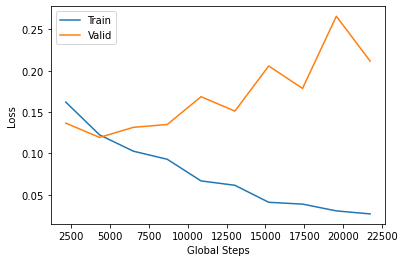

In [123]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

Model loaded from <== Model/metrics.pt


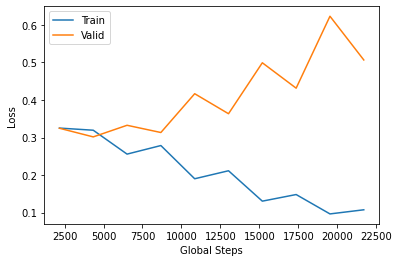

In [68]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

# Evaluation (Version3 modifications start here!)

In [19]:
import pandas as pd
test_new_data = pd.read_csv('annotations.csv',sep=',',encoding = "utf-8")

In [20]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2319 non-null   object
 1   Label   2319 non-null   object
dtypes: object(2)
memory usage: 36.4+ KB


In [21]:
[print(test_new_data['Text'][i]) for i in range(len(test_new_data['Text'])) if i <10]

@China_Amb_India Fucking piece of shit your whole community is solely responsible for the Chinese virus. Chinese dipshits should apologise to the world for their existence on this planet.
I’m not being funny but #Coronavirus in....   China  Iran  Italy   That’s some pretty random shit.
Got on the Victoria Line today to seven sisters and some chinese cunt coughed on me. Decked the cunt in his throat but now im worried that i’m gonna get the bat virus ffs
It's appalling that the media &amp; libtards bitch about the virus being referred to as the "Chinese Virus" but no one seems to give a shit about the poor lives of the dogs &amp; cats that are being eaten alive &amp; tortured for food. Why isn't PETA raising hell about this?  Just EVIL.
Dude fuck the Chinese man fuck em and if you think what I’m saying is wrong or rude you’re the problem
Dear @Twitter Could you please kindly TURN ON your Moderation so we the ppl stop seeing the "Korean / Vietnamese Bitching" going on under  #COVID19 ? T

[None, None, None, None, None, None, None, None, None, None]

In [22]:
test_new_data = test_new_data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [23]:
[print(test_new_data['Text'][i]) for i in range(len(test_new_data['Text'])) if i <10]

@China_Amb_India Fucking piece of shit your whole community is solely responsible for the Chinese virus. Chinese dipshits should apologise to the world for their existence on this planet.
Im not being funny but #Coronavirus in....   China  Iran  Italy   Thats some pretty random shit.
Got on the Victoria Line today to seven sisters and some chinese cunt coughed on me. Decked the cunt in his throat but now im worried that im gonna get the bat virus ffs
It's appalling that the media &amp; libtards bitch about the virus being referred to as the "Chinese Virus" but no one seems to give a shit about the poor lives of the dogs &amp; cats that are being eaten alive &amp; tortured for food. Why isn't PETA raising hell about this?  Just EVIL.
Dude fuck the Chinese man fuck em and if you think what Im saying is wrong or rude youre the problem
Dear @Twitter Could you please kindly TURN ON your Moderation so we the ppl stop seeing the "Korean / Vietnamese Bitching" going on under  #COVID19 ? Thank 

[None, None, None, None, None, None, None, None, None, None]

In [24]:
# import emoji
# text = []
# for i in tqdm(test_new_data['Text']):
#     text.append(emoji.demojize(i, delimiters=("", "")))
    

In [25]:
# [print(text[i]) for i in range(len(text)) if i <9]

In [26]:
# test_new_data['Text'] = text

In [27]:
from tqdm import tqdm
import re
for i in tqdm(test_new_data['Text']):
    user_name = re.findall(r'@\w*', i)
    for i in user_name:
        test_new_data['Text'] = test_new_data['Text'].apply(lambda x: x.replace(i, ""))

100%|███████████████████████████████████████████████████████████████████████████| 2319/2319 [00:00<00:00, 96746.38it/s]


In [28]:
[print(test_new_data['Text'][i]) for i in range(len(test_new_data['Text'])) if i <10]

 Fucking piece of shit your whole community is solely responsible for the Chinese virus. Chinese dipshits should apologise to the world for their existence on this planet.
Im not being funny but #Coronavirus in....   China  Iran  Italy   Thats some pretty random shit.
Got on the Victoria Line today to seven sisters and some chinese cunt coughed on me. Decked the cunt in his throat but now im worried that im gonna get the bat virus ffs
It's appalling that the media &amp; libtards bitch about the virus being referred to as the "Chinese Virus" but no one seems to give a shit about the poor lives of the dogs &amp; cats that are being eaten alive &amp; tortured for food. Why isn't PETA raising hell about this?  Just EVIL.
Dude fuck the Chinese man fuck em and if you think what Im saying is wrong or rude youre the problem
Dear  Could you please kindly TURN ON your Moderation so we the ppl stop seeing the "Korean / Vietnamese Bitching" going on under  #COVID19 ? Thank you. Some of us r intere

[None, None, None, None, None, None, None, None, None, None]

In [29]:
for i in tqdm(test_new_data['Text']):
    user_name = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', i)
    for i in user_name:
        test_new_data['Text'] = test_new_data['Text'].apply(lambda x: x.replace(i, ""))

100%|████████████████████████████████████████████████████████████████████████████| 2319/2319 [00:00<00:00, 3399.41it/s]


In [30]:
[print(test_new_data['Text'][i]) for i in range(len(test_new_data['Text'])) if i <10]

 Fucking piece of shit your whole community is solely responsible for the Chinese virus. Chinese dipshits should apologise to the world for their existence on this planet.
Im not being funny but #Coronavirus in....   China  Iran  Italy   Thats some pretty random shit.
Got on the Victoria Line today to seven sisters and some chinese cunt coughed on me. Decked the cunt in his throat but now im worried that im gonna get the bat virus ffs
It's appalling that the media &amp; libtards bitch about the virus being referred to as the "Chinese Virus" but no one seems to give a shit about the poor lives of the dogs &amp; cats that are being eaten alive &amp; tortured for food. Why isn't PETA raising hell about this?  Just EVIL.
Dude fuck the Chinese man fuck em and if you think what Im saying is wrong or rude youre the problem
Dear  Could you please kindly TURN ON your Moderation so we the ppl stop seeing the "Korean / Vietnamese Bitching" going on under  #COVID19 ? Thank you. Some of us r intere

[None, None, None, None, None, None, None, None, None, None]

In [31]:
test_new_data['Text'] = test_new_data['Text'].apply(lambda x:re.sub(r'[^A-Za-z0-9 ]+', ' ', x).lower())

In [32]:
from tqdm import tqdm
symbol_list = ['!','@','#','$','%','^','&','*','(',')','-','+','?','>','<','=','/','.',':',';','  ','   ','    ','      ','      ','  ']
for i in tqdm(symbol_list):
    test_new_data['Text'] = test_new_data['Text'].apply(lambda x: x.replace(i, ' '))

100%|████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1133.47it/s]


In [35]:
[print(test_new_data['Text'][i] + '                       ') for i in range(len(test_new_data['Text'])) if i <10]

 fucking piece of shit your whole community is solely responsible for the chinese virus chinese dipshits should apologise to the world for their existence on this planet                        
im not being funny but coronavirus in china iran italy thats some pretty random shit                        
got on the victoria line today to seven sisters and some chinese cunt coughed on me decked the cunt in his throat but now im worried that im gonna get the bat virus ffs                       
it s appalling that the media amp libtards bitch about the virus being referred to as the chinese virus but no one seems to give a shit about the poor lives of the dogs amp cats that are being eaten alive amp tortured for food why isn t peta raising hell about this just evil                        
dude fuck the chinese man fuck em and if you think what im saying is wrong or rude youre the problem                       
dear could you please kindly turn on your moderation so we the ppl stop seeing th

[None, None, None, None, None, None, None, None, None, None]

In [36]:
test_new_data.head()

,Text,Label
0,fucking piece of shit your whole community is...,Hate
1,im not being funny but coronavirus in china ir...,Neutral
2,got on the victoria line today to seven sister...,Hate
3,it s appalling that the media amp libtards bit...,Hate
4,dude fuck the chinese man fuck em and if you t...,Hate


In [37]:
ap=test_new_data.groupby(by=['Label'])
ap.size()

Label
Counterhate             359
Hate                    678
Neutral                 961
Non-Asian Aggression    321
dtype: int64

In [38]:
678/(678+359+961+321)

0.2923673997412678

In [39]:
# transfer the multi-label data into binary
label1 = []
for i in test_new_data['Label']:
    if i == 'Hate':
        label1.append(1.0)
    elif i == 'Non-Asian Aggression':
        label1.append(1.0)
    else:
        label1.append(0.0)

In [40]:
test_new_data['Label']  = label1

In [41]:
test_new_data.head()

,Text,Label
0,fucking piece of shit your whole community is...,1.0
1,im not being funny but coronavirus in china ir...,0.0
2,got on the victoria line today to seven sister...,1.0
3,it s appalling that the media amp libtards bit...,1.0
4,dude fuck the chinese man fuck em and if you t...,1.0


In [42]:
ap=test_new_data.groupby(by=['Label'])
ap.size()

Label
0.0    1320
1.0     999
dtype: int64

In [43]:
test_new_data['comment'] = test_new_data['Text']
test_new_data['attack'] = test_new_data['Label']
test_new_data = test_new_data.drop(columns = ['Text','Label'])

In [44]:
test_new_data.head()

,comment,attack
0,fucking piece of shit your whole community is...,1.0
1,im not being funny but coronavirus in china ir...,0.0
2,got on the victoria line today to seven sister...,1.0
3,it s appalling that the media amp libtards bit...,1.0
4,dude fuck the chinese man fuck em and if you t...,1.0


In [45]:
# double_comment = []
# for i in test_new_data['comment']:
#     double_comment.append(i+i)

In [46]:
# test_new_data['comment'] = double_comment

In [47]:
test_new_data.to_csv('Data/test6.csv',index=False,header=True)

In [48]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  2319 non-null   object 
 1   attack   2319 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.4+ KB


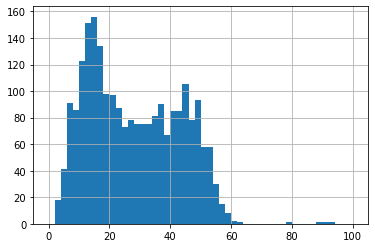

In [49]:
# the distrubution of the anti-asian test data

seq_len = [len(i.split()) for i in test_new_data['comment']]
pd.Series(seq_len).hist(bins = 50,range=[0,100])

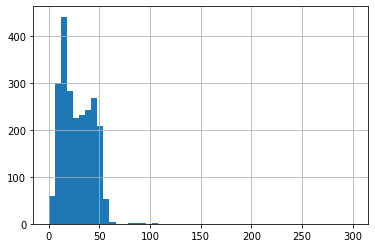

In [50]:
seq_len = [len(i.split()) for i in test_new_data['comment']]
pd.Series(seq_len).hist(bins = 50,range=[0,300])

In [64]:
from sklearn.metrics import roc_curve
def evaluate(model, test_loader):
    y_pred = []
    y_true = []
    y_prob = []
    model.eval()
    with torch.no_grad():
        for (comment,attack ), _ in test_loader:

                comment = comment.type(torch.LongTensor)           
                comment = comment.to(device)
                attack = attack.type(torch.LongTensor)  
                attack = attack.to(device)
                output = model(comment, attack)

                _, output = output
                y_prob.extend(output.tolist())
                y_pred.extend(torch.argmax(output, 1).tolist())
                y_true.extend(attack.tolist())
    return y_true, y_pred,y_prob    

In [65]:
best_model = BERT().to(device)

load_checkpoint(destination_folder + '/model.pt', best_model)

y_true, y_pred,y_prob = evaluate(best_model, test_iter)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Model loaded from <== Model/model.pt


In [66]:
label_true = []
for i in y_true:
    if i == 1:
        label_true.append([1,0])
    else:
        label_true.append([0,1])

In [67]:
y_prob_final = []
for i in range(len(y_prob)):
    tempA = abs(y_prob[i][0])
    tempB = abs(y_prob[i][1])
    y_prob_final.append(tempB/(tempA+tempB))

In [68]:
y_prob_final2 = []
for i in range(len(y_prob)):
    tempA = abs(y_prob[i][0])
    tempB = abs(y_prob[i][1])
    y_prob_final2.append(tempA/(tempA+tempB))

Classification Report:
              precision    recall  f1-score   support

           1     0.6339    0.6587    0.6460       999
           0     0.7338    0.7121    0.7228      1320

    accuracy                         0.6891      2319
   macro avg     0.6839    0.6854    0.6844      2319
weighted avg     0.6908    0.6891    0.6897      2319



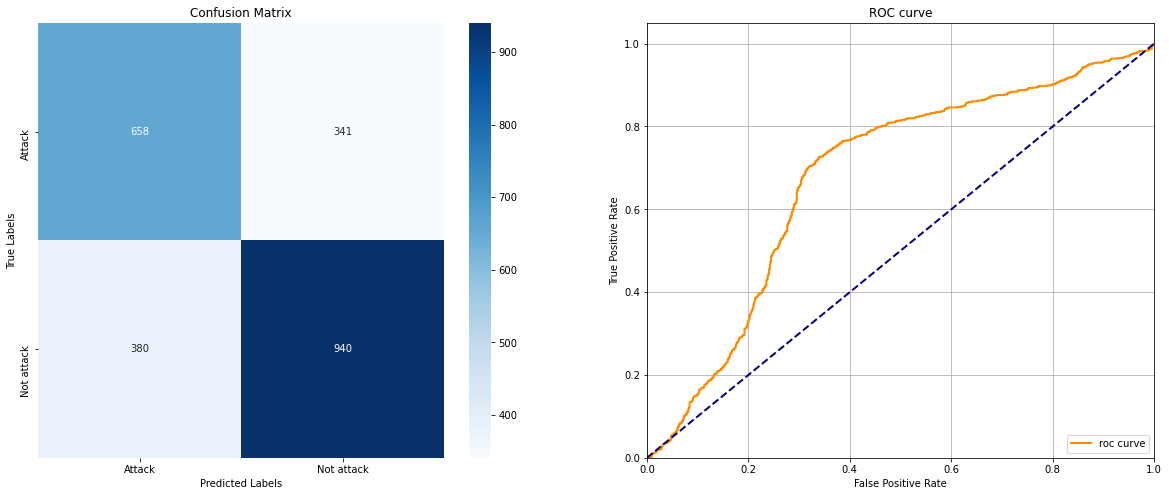

In [69]:
#version7: convert non-asian aggression to hate(0.0->1.0)  
from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1     0.4326    0.6622    0.5233       678
           0     0.8212    0.6411    0.7201      1641

    accuracy                         0.6473      2319
   macro avg     0.6269    0.6517    0.6217      2319
weighted avg     0.7076    0.6473    0.6625      2319



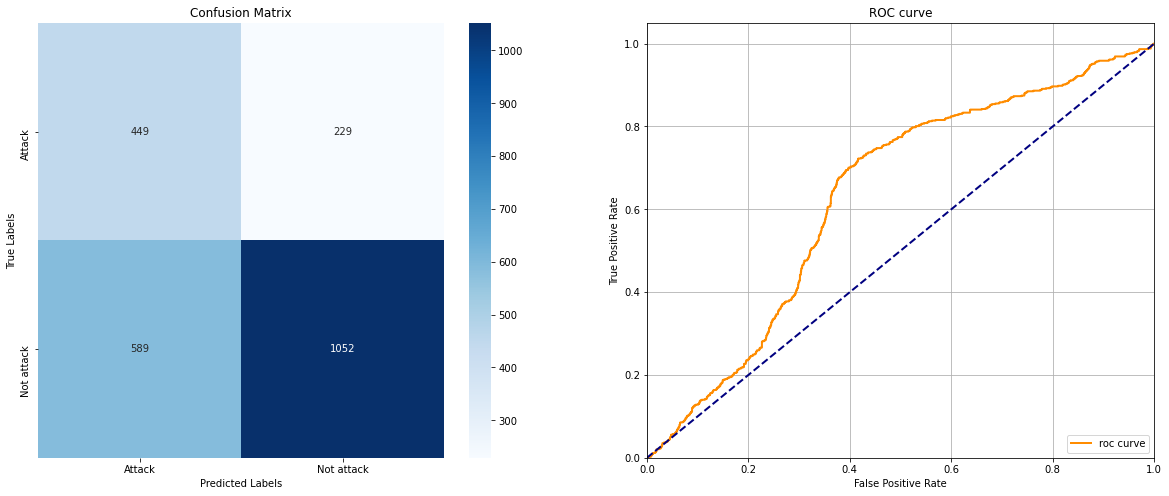

In [56]:
#version6: test anti-asian data by removing emoji
from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1     0.4269    0.6504    0.5155       678
           0     0.8157    0.6392    0.7168      1641

    accuracy                         0.6425      2319
   macro avg     0.6213    0.6448    0.6161      2319
weighted avg     0.7020    0.6425    0.6579      2319



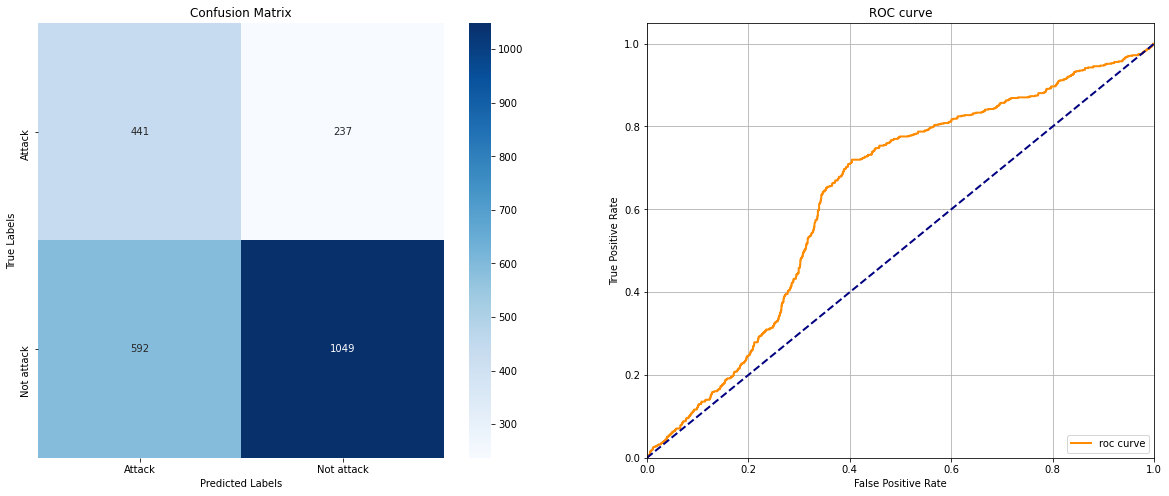

In [291]:
#version5: test anti_asian data with double text
from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1     0.4438    0.6003    0.5103       678
           0     0.8067    0.6892    0.7433      1641

    accuracy                         0.6632      2319
   macro avg     0.6253    0.6448    0.6268      2319
weighted avg     0.7006    0.6632    0.6752      2319



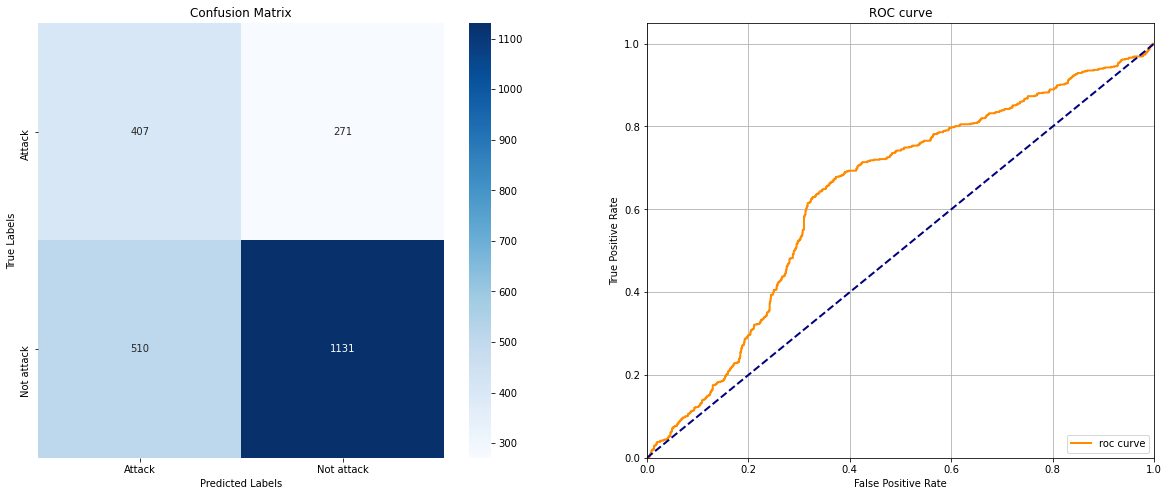

In [273]:
#version4: test anti-asian data with max_length = 60
from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1     0.4330    0.6578    0.5222       678
           0     0.8200    0.6441    0.7215      1641

    accuracy                         0.6481      2319
   macro avg     0.6265    0.6510    0.6219      2319
weighted avg     0.7069    0.6481    0.6632      2319



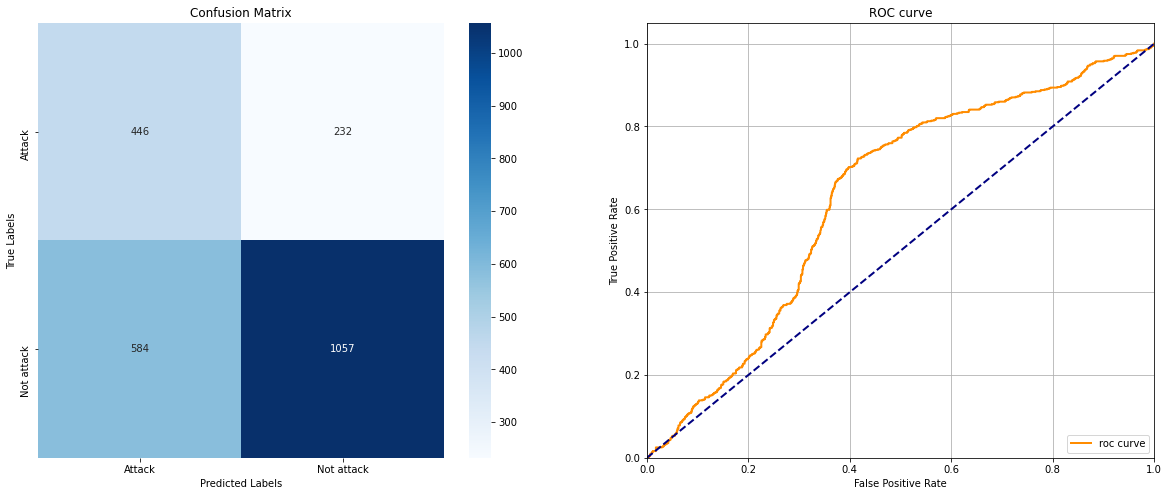

In [265]:
#version 3: test the anti-asian data with max_length = 128

from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1     0.8453    0.7790    0.8108      2756
           0     0.9705    0.9808    0.9756     20422

    accuracy                         0.9568     23178
   macro avg     0.9079    0.8799    0.8932     23178
weighted avg     0.9556    0.9568    0.9560     23178



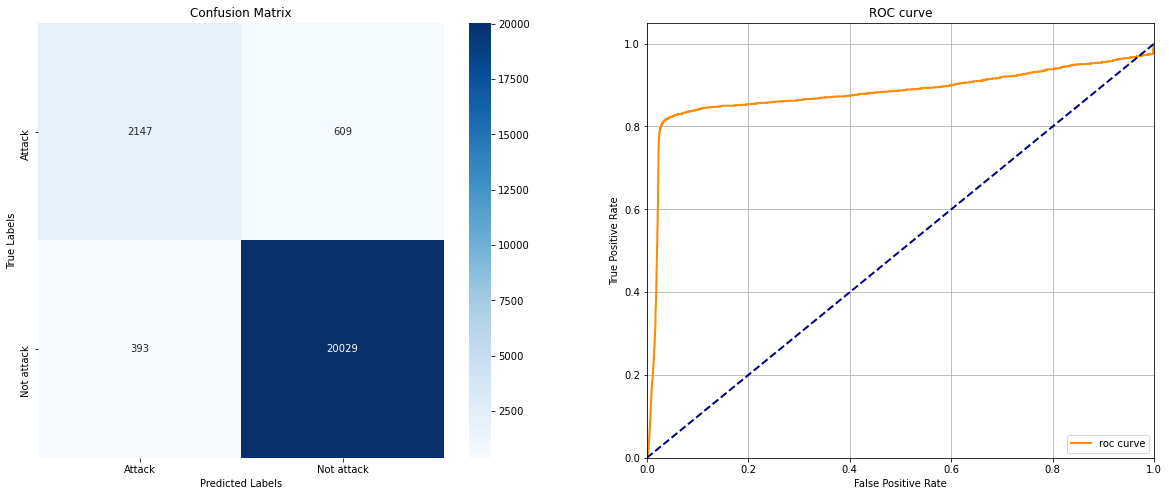

In [216]:
# version 2 after modify the roc curve
from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
plt.subplot(122)
lw = 2
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         lw=lw, label='roc curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1     0.8150    0.4179    0.5525      3869
           0     0.8936    0.9810    0.9352     19275

    accuracy                         0.8868     23144
   macro avg     0.8543    0.6994    0.7439     23144
weighted avg     0.8804    0.8868    0.8713     23144



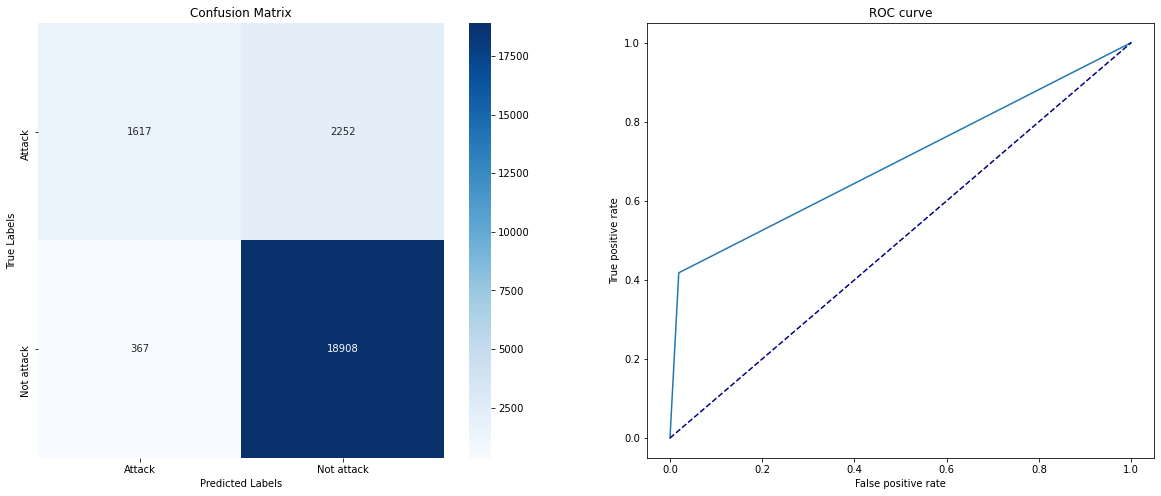

auc score: 0.6994486220075837


In [59]:
# Version one

from sklearn.metrics import roc_auc_score
print('Classification Report:')
print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

cm = confusion_matrix(y_true, y_pred, labels=[1,0])
plt.figure(1, figsize=(20,8))

ax= plt.subplot(121)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_pred)
plt.subplot(122)
plt.plot(fpr_rt_lm, tpr_rt_lm)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
#     plt.legend(loc='best')
plt.show()
print('auc score:', roc_auc_score(y_true, y_pred))